<h1 style="color:red" align="center"> Projet d'introduction au Machine Learning <br/> Out-Of-Domain PoS Tagging </h1>

<h2 style="color:green"> Introduction du projet </h2>

Le Part of speech tagging (PoS ou encore étiquetage morpho-syntaxique en français) consiste à construire un algorithme capable d'identifier et d'extraire les informations syntaxiques des mots contenue dans une phrases. Ainsi, notre algorithme doit être capable d'associer une étiquettes à chaque mot d'une phrases, cette étiquettes permettant de rendre compte à quelle classes syntaxiques appartient le mot.

Le PoS est un problème bien connue en linguistique. Il s'agit de la façon dont, nous autres humains, comprenons les mots et leurs fonctions dans une phrases. Il s'agit d'un processus d'apprentissage que nous faisons en étant enfant lorsque nous lisont ou écoutons pour la première fois.
Lorsque nous arrivons à identifier les structures syntaxiques d'une phrase, cela signifie que nous avons compris le contexte qui entoure la phrases, sa significations et donc de mieux la comprendre.
Ainsi, avec le developpement des techniques algorithmiques moderne et l'augmentation des vitesses de traitements des ordinateurs, Nous voulons donner à nos ordinateurs la capacité de pouvoir comprendre le langage humain que ce soit écrit ou oral. Cela permettrait d'améliorer les algorithmes de detection des erreurs, les assistants personnels tel <a href="https://www.apple.com/fr/siri/">Siri</a> ou <a href="https://www.microsoft.com/en-us/cortana">Cortana</a> ou encore le domaine de la robotique avec par exemple <a href="https://www.softbankrobotics.com/emea/fr/nao">Nao</a>.

<h3> Approche naive et identification des problèmes </h3>

Nous pourrions nous arrêter la et construire un algorithme général qui, étend donné tout les mots possible du dictionnaire d'un langage, renvoie la bonne classe syntaxique du mot, une sorte de grandes tables de hashage qui associe chaque mot du dictionnaire avec sa classe syntaxique. Nous pouvons tout de suite identifier une limite à cette algorithme.

Prenons l'exemple de deux phrases simple :
<ul>
    <li> Aujourd'hui, Il a noté beaucoup de rendez-vous dans son carnet.</li>
    <li> Le son d'un avion au décollage est très très fort.</li>
</ul>

Nous pouvons voir que le mot "son" est utilisé dans les deux phrases or leurs classes syntaxique à changé entre les deux. Dans la première phrase, "son" est utilisé comme étend un adjectifs possessif alors que dans la seconde, il s'agit du nom commun "son" qui décrit le phénoméne physique.
Nous avons identifier un premier problème à notre approche naive. Un même mot peut avoir plusieurs classes syntaxique qui dépend du contexte de la phrase. Il ne suffit plus simplement de se focaliser sur le mot seul mais sur toute la phrase en général.

Un autre problème est celui du <a href="https://en.wikipedia.org/wiki/Use%E2%80%93mention_distinction">use-mention distinction</a>. Ce problème peut être illustré de la façon suivante : <mark> Le mot "voiture" est composé de trois syllabes. </mark>. Dans cette exemple, le mot "voiture" peut être remplacé par n'importe quel mot contenant également trois syllabes. Ainsi, la différences entre "utilisé" un mot et y faire "référence" est dénotée dans cette exemple ( le "Brown Corpus tag set" <a href="https://en.wikipedia.org/wiki/Part-of-speech_tagging#Issues">ajoute</a> le tag -NC dans ces cas). Le problème est qu'on peut remplacé le mot par n'importe quelle autre, il s'agit d'une référence et doit donc avoir un tag syntaxique différent du reste des mots de la phrase.

De plus, si nous utilisions l'approche naive de la table de hash. Il se pose la question du nombre de mot d'une langue mais également de la définition d'un mot. De plus, il convient d'identifier de quelle langue ont parle. L'humanité, au cours de son histoire, s'est scindée en de multiple groupes sur toute la planète et chacun à évolué avec sa propre histoire, culture et langue. Ainsi, notre algorithme doit-il se focaliser sur une seul langue ou essayer de toute les englobers ?
Sur la question de la nature des mots d'une langue, il y a le cas des langues qui choisissent de composer des mots par associations comme l'allemand ou encore les langues agglutinantes comme <a href="https://en.wikipedia.org/wiki/Longest_word_in_Turkish">le turc</a>. Le français n'est pas <a href="https://en.wikipedia.org/wiki/Longest_word_in_French">en reste </a> non plus.

Cette question sur la nature des mots est intrinséquements lié avec avec celle du nombre de mot d'une langue. Par exemple, <em>le Larousse </em> rescense plus de 59 000 mots pour le français alors que <em> Le Littré </em> en compte pas moins de <a href="https://fr.babbel.com/fr/magazine/quelle-langue-contient-le-plus-de-mots">132 000</a>. Le nombre de mot d'une langue change en fonction de la définition que l'on donne à un mot.

Il est donc essentielle de trouver une autre approche à ce problème.

<h3> Approche du machine learning </h3>

Pour résoudre le problème concernant les langues, leurs nombreux mot ainsi que leurs définitions, le machine learning semble être la solution toute trouvé. Nous allons donner à notre algorithme 

In [1]:
import dataAnalysis as da
import pandas as pds
import matplotlib.pyplot as plt
import numpy as np
pds.set_option('display.max_colwidth', -1)
da.init()

Initialization...
	Preparing corpus fr.foot.test.json...
	Done
	Preparing corpus fr.gsd.test.json...
	Done
	Preparing corpus fr.sequoia.train.json...
	Done
	Preparing corpus fr.ftb.test.json...
	Done
	Preparing corpus fr.ftb.dev.json...
	Done
	Preparing corpus fr.spoken.test.json...
	Done
	Preparing corpus fr.pud.train.json...
	Done
	Preparing corpus fr.spoken.train.json...
	Done
	Preparing corpus fr.natdis.test.json...
	Done
	Preparing corpus fr.partut.dev.json...
	Done
	Preparing corpus fr.sequoia.test.json...
	Done
	Preparing corpus fr.gsd.dev.json...
	Done
	Preparing corpus fr.sequoia.dev.json...
	Done
	Preparing corpus fr.gsd.train.json...
	Done
	Preparing corpus fr.pud.test.json...
	Done
	Preparing corpus fr.ftb.train.json...
	Done
	Preparing corpus fr.partut.test.json...
	Done
	Preparing corpus fr.partut.train.json...
	Done
	Preparing corpus fr.spoken.dev.json...
	Done
Done!


In [2]:
dataAnalyse = da.dataAnalysis()
names = da.getCorpusNames()
tweetDataSet = [False for i in range(len(names))]
tweetDataSet[0] = True
tweetDataSet[8] = True
corpusDesc = {
    "nom du corpus" : names,
    "Corpus de tweet": tweetDataSet,
    "exemple de phrases": dataAnalyse[0],
    "nombre de phrases" : dataAnalyse[1],
    "nombre d'éléments (mot, ponctuation, ..) dans le corpus": dataAnalyse[2],
    "nombre d'éléments unique (mot, ponctuation, ..) dans le corpus": dataAnalyse[3]
}
corpusDataFrame = pds.DataFrame(data=corpusDesc)
corpusDataFrame.sort_values("nom du corpus", axis = 0, ascending = True, inplace = True, na_position ='last')
corpusDataFrame

nom du corpus  Corpus de tweet  \
0   fr.foot.test.json      True              
4   fr.ftb.dev.json        False             
3   fr.ftb.test.json       False             
15  fr.ftb.train.json      False             
11  fr.gsd.dev.json        False             
1   fr.gsd.test.json       False             
13  fr.gsd.train.json      False             
8   fr.natdis.test.json    True              
9   fr.partut.dev.json     False             
16  fr.partut.test.json    False             
17  fr.partut.train.json   False             
14  fr.pud.test.json       False             
6   fr.pud.train.json      False             
12  fr.sequoia.dev.json    False             
10  fr.sequoia.test.json   False             
2   fr.sequoia.train.json  False             
18  fr.spoken.dev.json     False             
5   fr.spoken.test.json    False             
7   fr.spoken.train.json   False             

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       exemple de phrases  \
0   [Barça - Juventus sa seras du gâteau pour le Barça BARRRCA __EMOTICON__ __EMOTICON__ __EMOTICON__, Barça // Juventus , je sens Neymar il va mettre son doublé ., Barça B draw 1–1 with Racing , settle for insufficient point ✪ __URL__ __URL__]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
4   [Nous prions les cinéastes et tous nos lecteurs de bien vouloir nous en excuser ., La diffusion des prévisions météorologiques était fortement perturbée , mardi __DIGIT__ janvier , par le mouvement de grève nationale de trente - six heures déclenché la veille au soir , à l' appel des délégués CGT , CFDT et FO du personnel technique de Météo - France ., Par cette action , ces derniers veulent dénoncer la baisse des effectifs qui se traduit , affirment -ils , par " l' abandon de certaines tâches et le recours à la sous - traitance " .]                                                                                                                                                                                                                                                                                                                                                                                             
3   [La limite des intérêts des emprunts contractés depuis le __DIGIT__ septembre __DIGIT__ pour l' acquisition d' un logement neuf ( intérêts déductibles des impôts à raison de __DIGIT__ % ) est fixée à 20 000 francs pour les personnes seules contre 15 000 francs précédemment et à 40 000 francs pour les couples ma

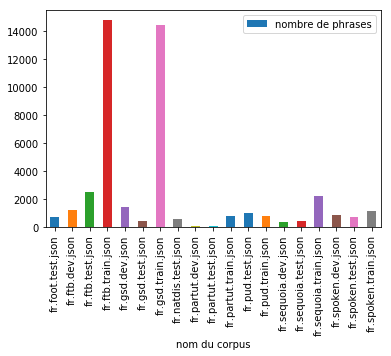

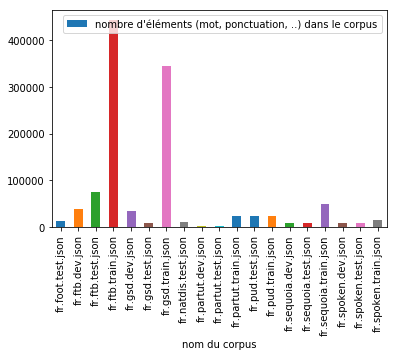

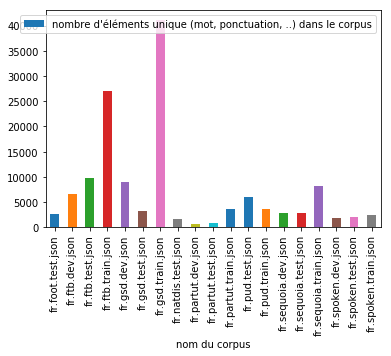

In [3]:
corpusDataFrame.plot(kind='bar',x='nom du corpus',y='nombre de phrases')
corpusDataFrame.plot(kind='bar',x='nom du corpus',y='nombre d\'éléments (mot, ponctuation, ..) dans le corpus')
corpusDataFrame.plot(kind='bar',x='nom du corpus',y='nombre d\'éléments unique (mot, ponctuation, ..) dans le corpus')

## Out of vocabulary words

Ce sont les mots qui apparaissent dans l'ensemble de test mais pas dans l'ensemble d'apprentissage. Ainsi, 
plus le pourcentage est faible, plus l'ensemble de test et d'apprentissage ont un vocabulaire proche.
Inversement, un pourcentage élevé indique une grande différence entre le vocabulaires de l'ensemble
d'apprentissage et de l'ensemble de test.

On s'attend à avoir de meilleurs résultat lorsque le pourcentage entre l'ensemble d'apprentissage et l'ensemble de test est faible. La meilleurs solution serait de determiné l'ensemble d'apprentissage ayant le plus faible pourcentage d'OOV avec tous les autres dataset. Cela permettrait à l'algorithme d'apprendre sur une plus grande base de mot connue.

In [4]:
oovResult = da.computeOOV()
oovDataFrame = pds.DataFrame(data={"test corpus": oovResult[1],
                                   "OOV percentage": oovResult[2]},
                                    index=oovResult[0])

for corpus in da.listeCorpus:
    print("1")
    if corpus.name in oovDataFrame.index:
        print("2")
        subDF = oovDataFrame.loc[corpus.name,:]
        if len(subDF.index) > 2:
            subDF.sort_values("OOV percentage", axis = 0, ascending = True, inplace = True, na_position ='last')
        display(subDF)

1
2


/home/fusroman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


test corpus  OOV percentage
fr.foot.test.json  fr.partut.dev.json     14.136594     
fr.foot.test.json  fr.partut.test.json    16.391544     
fr.foot.test.json  fr.natdis.test.json    26.141954     
fr.foot.test.json  fr.spoken.dev.json     30.251545     
fr.foot.test.json  fr.spoken.test.json    31.918579     
fr.foot.test.json  fr.spoken.train.json   36.984711     
fr.foot.test.json  fr.sequoia.dev.json    42.749217     
fr.foot.test.json  fr.sequoia.test.json   42.949640     
fr.foot.test.json  fr.gsd.test.json       43.631670     
fr.foot.test.json  fr.pud.train.json      48.668662     
fr.foot.test.json  fr.partut.train.json   48.668662     
fr.foot.test.json  fr.pud.test.json       60.321685     
fr.foot.test.json  fr.ftb.dev.json        62.267233     
fr.foot.test.json  fr.sequoia.train.json  67.199483     
fr.foot.test.json  fr.gsd.dev.json        69.315635     
fr.foot.test.json  fr.ftb.test.json       71.320997     
fr.foot.test.json  fr.ftb.train.json      86.672266     
fr.foot.test.json  fr.gsd.train.json      90.469000

1
2


test corpus  OOV percentage
fr.gsd.test.json  fr.partut.dev.json     10.007718     
fr.gsd.test.json  fr.partut.test.json    11.637823     
fr.gsd.test.json  fr.natdis.test.json    23.547783     
fr.gsd.test.json  fr.spoken.dev.json     24.378208     
fr.gsd.test.json  fr.spoken.test.json    25.737578     
fr.gsd.test.json  fr.spoken.train.json   30.187686     
fr.gsd.test.json  fr.sequoia.dev.json    33.215903     
fr.gsd.test.json  fr.sequoia.test.json   34.000656     
fr.gsd.test.json  fr.partut.train.json   38.206656     
fr.gsd.test.json  fr.pud.train.json      38.206656     
fr.gsd.test.json  fr.pud.test.json       50.544900     
fr.gsd.test.json  fr.ftb.dev.json        52.958732     
fr.gsd.test.json  fr.sequoia.train.json  58.518975     
fr.gsd.test.json  fr.gsd.dev.json        60.341134     
fr.gsd.test.json  fr.ftb.test.json       62.618115     
fr.gsd.test.json  fr.ftb.train.json      81.741972     
fr.gsd.test.json  fr.gsd.train.json      86.940602

1
2


test corpus  OOV percentage
fr.sequoia.train.json  fr.partut.test.json   2.466667      
fr.sequoia.train.json  fr.partut.dev.json    2.674157      
fr.sequoia.train.json  fr.sequoia.dev.json   7.289958      
fr.sequoia.train.json  fr.sequoia.test.json  7.661835      
fr.sequoia.train.json  fr.spoken.dev.json    8.949301      
fr.sequoia.train.json  fr.natdis.test.json   9.168704      
fr.sequoia.train.json  fr.spoken.test.json   9.198229      
fr.sequoia.train.json  fr.spoken.train.json  12.058988     
fr.sequoia.train.json  fr.pud.train.json     13.687574     
fr.sequoia.train.json  fr.partut.train.json  13.687574     
fr.sequoia.train.json  fr.pud.test.json      24.751568     
fr.sequoia.train.json  fr.ftb.dev.json       25.369993     
fr.sequoia.train.json  fr.ftb.test.json      35.341098     
fr.sequoia.train.json  fr.gsd.dev.json       35.442300     
fr.sequoia.train.json  fr.ftb.train.json     61.525827     
fr.sequoia.train.json  fr.gsd.train.json     71.851717

1
2


test corpus  OOV percentage
fr.ftb.test.json  fr.partut.test.json   1.866792      
fr.ftb.test.json  fr.partut.dev.json    2.225379      
fr.ftb.test.json  fr.spoken.dev.json    6.823409      
fr.ftb.test.json  fr.spoken.test.json   7.247357      
fr.ftb.test.json  fr.natdis.test.json   7.310910      
fr.ftb.test.json  fr.spoken.train.json  9.140133      
fr.ftb.test.json  fr.sequoia.dev.json   10.052240     
fr.ftb.test.json  fr.sequoia.test.json  10.370486     
fr.ftb.test.json  fr.pud.train.json     10.432345     
fr.ftb.test.json  fr.partut.train.json  10.432345     
fr.ftb.test.json  fr.ftb.dev.json       16.540574     
fr.ftb.test.json  fr.pud.test.json      20.360906     
fr.ftb.test.json  fr.gsd.dev.json       30.256792     
fr.ftb.test.json  fr.ftb.train.json     52.350427     
fr.ftb.test.json  fr.gsd.train.json     67.246696

1
2


test corpus  OOV percentage
fr.ftb.dev.json  fr.partut.test.json   3.546196      
fr.ftb.dev.json  fr.partut.dev.json    4.173554      
fr.ftb.dev.json  fr.spoken.dev.json    11.340206     
fr.ftb.dev.json  fr.spoken.test.json   11.554252     
fr.ftb.dev.json  fr.natdis.test.json   12.010763     
fr.ftb.dev.json  fr.spoken.train.json  15.065021     
fr.ftb.dev.json  fr.sequoia.dev.json   16.027427     
fr.ftb.dev.json  fr.sequoia.test.json  16.446604     
fr.ftb.dev.json  fr.pud.train.json     17.856446     
fr.ftb.dev.json  fr.partut.train.json  17.856446     
fr.ftb.dev.json  fr.pud.test.json      30.376922     
fr.ftb.dev.json  fr.gsd.dev.json       41.072925     
fr.ftb.dev.json  fr.ftb.train.json     64.323474     
fr.ftb.dev.json  fr.gsd.train.json     75.970767

1
2


test corpus  OOV percentage
fr.spoken.test.json  fr.partut.dev.json    17.328386     
fr.spoken.test.json  fr.partut.test.json   19.069767     
fr.spoken.test.json  fr.spoken.dev.json    31.362932     
fr.spoken.test.json  fr.natdis.test.json   33.951814     
fr.spoken.test.json  fr.spoken.train.json  38.744733     
fr.spoken.test.json  fr.sequoia.dev.json   46.781296     
fr.spoken.test.json  fr.sequoia.test.json  47.450020     
fr.spoken.test.json  fr.pud.train.json     51.678678     
fr.spoken.test.json  fr.partut.train.json  51.678678     
fr.spoken.test.json  fr.pud.test.json      63.577154     
fr.spoken.test.json  fr.gsd.dev.json       72.432383     
fr.spoken.test.json  fr.ftb.train.json     87.875769     
fr.spoken.test.json  fr.gsd.train.json     91.605500

1
2


test corpus  OOV percentage
fr.pud.train.json  fr.partut.train.json  0.000000      
fr.pud.train.json  fr.partut.test.json   4.995579      
fr.pud.train.json  fr.partut.dev.json    6.080470      
fr.pud.train.json  fr.natdis.test.json   20.617978     
fr.pud.train.json  fr.spoken.dev.json    20.810280     
fr.pud.train.json  fr.spoken.train.json  25.921770     
fr.pud.train.json  fr.sequoia.dev.json   26.146507     
fr.pud.train.json  fr.sequoia.test.json  27.250792     
fr.pud.train.json  fr.pud.test.json      44.908885     
fr.pud.train.json  fr.gsd.dev.json       56.411268     
fr.pud.train.json  fr.ftb.train.json     78.022441     
fr.pud.train.json  fr.gsd.train.json     84.794891

1
2


test corpus  OOV percentage
fr.spoken.train.json  fr.partut.dev.json    12.946979     
fr.spoken.train.json  fr.partut.test.json   15.281100     
fr.spoken.train.json  fr.spoken.dev.json    23.581280     
fr.spoken.train.json  fr.natdis.test.json   28.317308     
fr.spoken.train.json  fr.sequoia.dev.json   40.109064     
fr.spoken.train.json  fr.sequoia.test.json  40.909925     
fr.spoken.train.json  fr.partut.train.json  44.838089     
fr.spoken.train.json  fr.pud.test.json      57.295207     
fr.spoken.train.json  fr.gsd.dev.json       67.119116     
fr.spoken.train.json  fr.ftb.train.json     85.058673     
fr.spoken.train.json  fr.gsd.train.json     89.578221

1
2


test corpus  OOV percentage
fr.natdis.test.json  fr.partut.dev.json    20.716113     
fr.natdis.test.json  fr.partut.test.json   24.325429     
fr.natdis.test.json  fr.spoken.dev.json    42.553191     
fr.natdis.test.json  fr.sequoia.dev.json   53.257919     
fr.natdis.test.json  fr.sequoia.test.json  53.459258     
fr.natdis.test.json  fr.partut.train.json  59.531835     
fr.natdis.test.json  fr.pud.test.json      69.875573     
fr.natdis.test.json  fr.gsd.dev.json       77.725342     
fr.natdis.test.json  fr.ftb.train.json     90.760832     
fr.natdis.test.json  fr.gsd.train.json     93.588272

1
2


test corpus  OOV percentage
fr.partut.dev.json  fr.partut.test.json   38.954248     
fr.partut.dev.json  fr.spoken.dev.json    63.549253     
fr.partut.dev.json  fr.sequoia.dev.json   70.662100     
fr.partut.dev.json  fr.sequoia.test.json  71.322519     
fr.partut.dev.json  fr.partut.train.json  73.756781     
fr.partut.dev.json  fr.pud.test.json      82.988540     
fr.partut.dev.json  fr.gsd.dev.json       87.746668     
fr.partut.dev.json  fr.ftb.train.json     95.348754     
fr.partut.dev.json  fr.gsd.train.json     96.788475

1
2


test corpus  OOV percentage
fr.sequoia.test.json  fr.partut.test.json   11.078405     
fr.sequoia.test.json  fr.spoken.dev.json    27.325581     
fr.sequoia.test.json  fr.sequoia.dev.json   28.243740     
fr.sequoia.test.json  fr.partut.train.json  39.119288     
fr.sequoia.test.json  fr.pud.test.json      53.786691     
fr.sequoia.test.json  fr.gsd.dev.json       63.696786     
fr.sequoia.test.json  fr.ftb.train.json     83.021066     
fr.sequoia.test.json  fr.gsd.train.json     88.225667

1
2


test corpus  OOV percentage
fr.gsd.dev.json  fr.partut.test.json   3.129154      
fr.gsd.dev.json  fr.spoken.dev.json    8.030945      
fr.gsd.dev.json  fr.sequoia.dev.json   12.413852     
fr.gsd.dev.json  fr.partut.train.json  14.945159     
fr.gsd.dev.json  fr.pud.test.json      22.648316     
fr.gsd.dev.json  fr.ftb.train.json     60.677177     
fr.gsd.dev.json  fr.gsd.train.json     69.168199

1
2


test corpus  OOV percentage
fr.sequoia.dev.json  fr.partut.test.json   11.736959     
fr.sequoia.dev.json  fr.spoken.dev.json    28.165706     
fr.sequoia.dev.json  fr.partut.train.json  40.304709     
fr.sequoia.dev.json  fr.pud.test.json      55.157512     
fr.sequoia.dev.json  fr.ftb.train.json     83.804653     
fr.sequoia.dev.json  fr.gsd.train.json     88.789585

1
2


test corpus  OOV percentage
fr.gsd.train.json  fr.partut.test.json   0.188603      
fr.gsd.train.json  fr.spoken.dev.json    0.791323      
fr.gsd.train.json  fr.partut.train.json  1.359952      
fr.gsd.train.json  fr.pud.test.json      2.933554      
fr.gsd.train.json  fr.ftb.train.json     19.107318

1
2


test corpus  OOV percentage
fr.pud.test.json  fr.partut.test.json   4.898079      
fr.pud.test.json  fr.spoken.dev.json    12.686756     
fr.pud.test.json  fr.partut.train.json  21.280758     
fr.pud.test.json  fr.ftb.train.json     69.424406

1
2


test corpus  OOV percentage
fr.ftb.train.json  fr.partut.test.json   0.264834      
fr.ftb.train.json  fr.spoken.dev.json    1.509252      
fr.ftb.train.json  fr.partut.train.json  2.078739

1
2


test corpus  OOV percentage
fr.partut.test.json  fr.partut.train.json  68.965517     
fr.partut.test.json  fr.spoken.dev.json    60.317460

1
2


test corpus       fr.spoken.dev.json
OOV percentage    20.8103           
Name: fr.partut.train.json, dtype: object

1


Au regard des ces résultats, nous pouvont voir que le dataset <mark> fr.partut.test.json </mark> possèdent le plus faible pourcentage d'OOV avec les autres autres dataset. Cela semble être un bon point de départ pour entrainer notre algorithme d'apprentissage.

## KL divergence of three-grams

La divergence de KullBack-Leiber tire son origine de la théorie de l'information. L'objectif de la théorie de l'information est de déterminé la quantité d'information qu'il y a dans une donnée. La métrique la plus importante de la théorie de l'information est la mesure de l'entropie notée H. Sa définitino est :
$H = -\sum_{i=1}^{N} p(x_i)\cdot log_2(p(x_i))$ L'utilisation d'un log en base 2 nous permet d'approcher la quantité minimal, la borne inférieur de bits nécessaire pour encoder la donnée $x_i$.

Maintenant que l'on peut connaitre la quantité d'information contenue dans une donnée, nous voulons quantifier la quantité d'information que l'on perd lorsque l'on passe d'une distribution observé (ici, notre ensemble de test) à une distribution paramétrisé (ici, notre ensemble d'apprentissage). 
C'est l'objectif de la divergence de KullBack-Leibler. 
Sa définition est la suivante :
$D_{KL}(p||q) = \sum_{i=1}^{N} p(x_i)\cdot [log_2(p(x_i)) - log_2(q(x_i))] = \sum_{i=1}^{N} p(x_i)\cdot log_2(\frac{p(x_i)}{q(x_i)})$

Lorsque la valeur de cette métrique augmente, cela indique que l'on perd plus d'information en passant de la distribution observée à la distribution paramétrisé et inversement lorsque la métrique diminue. De plus, la divergence de KullBack-Leibler n'est pas symetrique, ainsi $DKL(observed||param) \neq DKL(param||observed)$. C'est pour cette raison que nous calculons la DKL de tous les couples de l'ensemble des corpus et que nous n'utilisons pas l'optimisation effectué pour le calcul de l'OOV.

Dans notre exemple, l'utilisation de la divergence de Kullback-Leibler entre un ensemble d'apprentissage et de test nous permettra de quantifier la quantité d'information que le classifier n'aura pas réussi à récupéré par le biais de son apprentissage. Ainsi, il sera judicieux d'utiliser un ensemble d'apprentissage ayant une divergence la plus faible possible vis-à-vis de l'ensemble de test. 

In [5]:
#test = da.computeKLDivergence(da.listeCorpus[0], da.listeCorpus[1])
test2 = da.computeKLDivergence(da.listeCorpus[1], da.listeCorpus[0])
#print(test)
print(test2)

grams :  ('Je', 'sens', "qu'")  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.821911017573748e-09
grams :  ('sens', "qu'", 'entre')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.643822035147496e-09
grams :  ("qu'", 'entre', 'ça')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -8.465733052721244e-09
grams :  ('entre', 'ça', 'et')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.1287644070294992e-08
grams :  ('ça', 'et', 'les')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.410955508786874e-08
grams :  ('et', 'les', 'films')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.69314661

dkl :  -1.9612281572137554e-07
grams :  ('la', 'détention', 'arbitraire')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.989447267389493e-07
grams :  ('détention', 'arbitraire', ',')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.0176663775652305e-07
grams :  ('arbitraire', ',', 'les')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.045885487740968e-07
grams :  (',', 'les', 'coups')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.0741045979167056e-07
grams :  ('les', 'coups', 'et')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.102323708092443e-07
grams :  ('coups', 'et', 'les')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.169622

dkl :  -4.4586194077665107e-07
grams :  ('les', 'dents', 'dans')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.486838517942248e-07
grams :  ('dents', 'dans', 'un')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.515057628117985e-07
grams :  ('dans', 'un', 'discours')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.5432767382937225e-07
grams :  ('un', 'discours', 'humiliant')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.57149584846946e-07
grams :  ('discours', 'humiliant', 'pour')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.599714958645197e-07
grams :  ('humiliant', 'pour', 'les')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1

grams :  (',', 'mais', "c'")  -> occur :  2
p_test :  1.2507049807074588e-08
p_train :  1.7544331704503932e-08
log :  -0.338438448047621
dkl :  -5.883684471641264e-07
grams :  ('mais', "c'", 'est')  -> occur :  4
p_test :  2.084508301179098e-08
p_train :  2.924055284083989e-08
log :  -0.3384384480476212
dkl :  -5.954232247080608e-07
grams :  ("c'", 'est', 'à')  -> occur :  2
p_test :  1.2507049807074588e-08
p_train :  1.7544331704503932e-08
log :  -0.338438448047621
dkl :  -5.996560912344215e-07
grams :  ('est', 'à', 'lui')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -6.024780022519953e-07
grams :  ('à', 'lui', "qu'")  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -6.05299913269569e-07
grams :  ('lui', "qu'", 'ils')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -6.081218242871428e-07


grams :  ('__DIGIT__', '%', 'Waterproof')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -7.449845086394712e-07
grams :  ('%', 'Waterproof', '.')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -7.47806419657045e-07
grams :  ('Son', 'discours', ',')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -7.506283306746188e-07
grams :  ('discours', ',', 'inspiré')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -7.534502416921926e-07
grams :  (',', 'inspiré', "d'")  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -7.562721527097663e-07
grams :  ('inspiré', "d'", 'une')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.33843844804

p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -9.241758582554063e-07
grams :  ('avec', 'un', 'peu')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -9.269977692729801e-07
grams :  ('un', 'peu', 'de')  -> occur :  2
p_test :  1.2507049807074588e-08
p_train :  1.7544331704503932e-08
log :  -0.338438448047621
dkl :  -9.312306357993408e-07
grams :  ('peu', 'de', 'bonne')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -9.340525468169146e-07
grams :  ('de', 'bonne', 'volonté')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -9.368744578344884e-07
grams :  ('bonne', 'volonté', 'vous')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -9.396963688520621e-07
grams :  ('volonté', 'vous', 'observerez')  -> occur :  1


p_train :  1.7544331704503932e-08
log :  -0.338438448047621
dkl :  -1.1823807163634068e-06
grams :  ('elle', 'est', 'pourtant')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.1852026273809806e-06
grams :  ('est', 'pourtant', 'déjà')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.1880245383985544e-06
grams :  ('pourtant', 'déjà', 'à')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.1908464494161282e-06
grams :  ('déjà', 'à', 'la')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.193668360433702e-06
grams :  ('à', 'la', 'retraite')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.1964902714512757e-06
grams :  ('la', 'retraite', '.')  -> occur :  1
p

log :  -0.338438448047621
dkl :  -1.433530796927473e-06
grams :  ('européenne', ',', 'sur')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.4363527079450467e-06
grams :  (',', 'sur', 'la')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.4391746189626205e-06
grams :  ('sur', 'la', 'base')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.4419965299801943e-06
grams :  ('la', 'base', 'notamment')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.444818440997768e-06
grams :  ('base', 'notamment', 'des')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.4476403520153418e-06
grams :  ('notamment', 'des', 'informations')  -> occur :  1
p_test :  8.338033204716

grams :  ('la', 'mort', "d'")  -> occur :  2
p_test :  1.2507049807074588e-08
p_train :  1.7544331704503932e-08
log :  -0.338438448047621
dkl :  -1.7157218986848509e-06
grams :  ('mort', "d'", 'un')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.7185438097024247e-06
grams :  ("d'", 'un', 'poète')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.7213657207199984e-06
grams :  ('un', 'poète', '.')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.7241876317375722e-06
grams :  ('Les', 'lendemains', 'de')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.727009542755146e-06
grams :  ('lendemains', 'de', 'lynchage')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl

grams :  ('h', '__DIGIT__', 'en')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.916077580932589e-06
grams :  ('__DIGIT__', 'en', 'territoire')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.9188994919501625e-06
grams :  ('en', 'territoire', 'algérien')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.921721402967736e-06
grams :  ('territoire', 'algérien', '.')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.9245433139853096e-06
grams :  ('Car', 'le', 'gouvernement')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.9273652250028832e-06
grams :  ('le', 'gouvernement', 'marocain')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.169622113

grams :  ('présent', 'dans', 'sa')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.271638369146859e-06
grams :  ('dans', 'sa', 'passion')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.2744602801644327e-06
grams :  ('sa', 'passion', '.')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.2772821911820063e-06
grams :  ('Plus', ',', "l'")  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.28010410219958e-06
grams :  (',', "l'", 'AQMI')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.2829260132171534e-06
grams :  ("l'", 'AQMI', 'tente')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.285

p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.61450055778205e-06
grams :  ('que', 'le', 'fondamentalisme')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.6173224687996238e-06
grams :  ('le', 'fondamentalisme', 'a')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.6201443798171973e-06
grams :  ('fondamentalisme', 'a', 'toujours')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.622966290834771e-06
grams :  ('a', 'toujours', 'été')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.6257882018523445e-06
grams :  ('toujours', 'été', 'là')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.62861011286991

p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.8924587930130487e-06
grams :  ('eau', 'ne', 'soit')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.8952807040306223e-06
grams :  ('ne', 'soit', 'pas')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.898102615048196e-06
grams :  ('soit', 'pas', 'si')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.9009245260657694e-06
grams :  ('pas', 'si', 'brillant')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.903746437083343e-06
grams :  ('si', 'brillant', 'que')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.9065683481009166e-06
grams :  ('brillant', 'que

grams :  ('exercées', 'contre', 'le')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.1845265833319142e-06
grams :  ('contre', 'le', 'droit')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.187348494349488e-06
grams :  ('le', 'droit', 'du')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.1901704053670614e-06
grams :  ('droit', 'du', 'peuple')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.192992316384635e-06
grams :  ('du', 'peuple', 'sahraouie')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.1958142274022085e-06
grams :  ('peuple', 'sahraouie', 'à')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.33843

p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.499169661791369e-06
grams :  ('étaient', 'des', 'séquestrés')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.5019915728089427e-06
grams :  ('des', 'séquestrés', 'qui')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.5048134838265163e-06
grams :  ('séquestrés', 'qui', "s'")  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.50763539484409e-06
grams :  ('qui', "s'", 'étaient')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.5104573058616635e-06
grams :  ("s'", 'étaient', 'évadés')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.513279216879237e-06
grams :  ('étaient', 'évadés', 'des

p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.857552361023219e-06
grams :  ('la', 'situation', 'ne')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.860374272040793e-06
grams :  ('situation', 'ne', 'dégénère')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.863196183058367e-06
grams :  ('ne', 'dégénère', 'si')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.866018094075941e-06
grams :  ('dégénère', 'si', "l'")  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.868840005093515e-06
grams :  ('si', "l'", 'aide')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.871661916111089e-06
grams :  ("l'", 'ai

p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.2117021937287555e-06
grams :  ('changement', 'total', ',')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.2145241047463294e-06
grams :  ('total', ',', 'encore')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.2173460157639034e-06
grams :  (',', 'encore', 'moins')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.2201679267814774e-06
grams :  ('encore', 'moins', 'un')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.2229898377990514e-06
grams :  ('moins', 'un', 'reniement')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.225811748816625e-06
grams :  

p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.4614413187840505e-06
grams :  ('opérateur', 'du', 'pays')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.4642632298016245e-06
grams :  ('pays', ',', "d'")  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.4670851408191985e-06
grams :  (',', "d'", 'abandonner')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.4699070518367724e-06
grams :  ("d'", 'abandonner', 'des')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.4727289628543464e-06
grams :  ('abandonner', 'des', 'pans')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.4755508738719204e-06
grams :  ('des', 'pans', 'entiers')  -> oc

log :  -0.338438448047621
dkl :  -4.691427066716331e-06
grams :  ('histoire', 'de', 'ce')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.694248977733905e-06
grams :  ('de', 'ce', 'projet')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.697070888751479e-06
grams :  ('ce', 'projet', 'industriel')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.699892799769053e-06
grams :  ('projet', 'industriel', ',')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.702714710786627e-06
grams :  ('industriel', ',', 'il')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.705536621804201e-06
grams :  (',', 'il', 'nous')  -> occur :  2
p_test :  1.2507049807074588e-08
p_

grams :  ('avoir', 'examiné', "l'")  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.9439881027892025e-06
grams :  ('examiné', "l'", 'état')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.9468100138067765e-06
grams :  ("l'", 'état', 'des')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.9496319248243504e-06
grams :  ('état', 'des', 'relations')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.9524538358419244e-06
grams :  ('des', 'relations', 'bilatérales')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.9552757468594984e-06
grams :  ('relations', 'bilatérales', ',')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
l

grams :  ('Tout', 'en', 'estimant')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.137289007493019e-06
grams :  ('en', 'estimant', 'que')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.140110918510593e-06
grams :  ('estimant', 'que', '«')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.142932829528167e-06
grams :  ('que', '«', 'le')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.145754740545741e-06
grams :  ('«', 'le', 'Maroc')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.148576651563315e-06
grams :  ('le', 'Maroc', 'est')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.151

p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.302370802021096e-06
grams :  ('la', 'surveillance', 'et')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.30519271303867e-06
grams :  ('surveillance', 'et', 'le')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.308014624056244e-06
grams :  ('et', 'le', 'contrôle')  -> occur :  2
p_test :  1.2507049807074588e-08
p_train :  1.7544331704503932e-08
log :  -0.338438448047621
dkl :  -5.312247490582605e-06
grams :  ('le', 'contrôle', 'des')  -> occur :  2
p_test :  1.2507049807074588e-08
p_train :  1.7544331704503932e-08
log :  -0.338438448047621
dkl :  -5.316480357108966e-06
grams :  ('contrôle', 'des', 'droits')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.31930226812654e-06
grams :  ('des', 'droits', 'de')  -> occu

p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.570452348690623e-06
grams :  ('main', ',', 'on')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.573274259708197e-06
grams :  (',', 'on', "n'")  -> occur :  2
p_test :  1.2507049807074588e-08
p_train :  1.7544331704503932e-08
log :  -0.338438448047621
dkl :  -5.577507126234558e-06
grams :  ('on', "n'", 'en')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.580329037252132e-06
grams :  ("n'", 'en', 'revenait')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.583150948269706e-06
grams :  ('en', 'revenait', 'pas')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.58597285928728e-06
grams :  ('revenait', 'pas', ';')  -> oc

p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.8089038296756255e-06
grams :  ('Moubarak', ',', 'éprouve')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.8117257406931994e-06
grams :  (',', 'éprouve', ',')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.8145476517107734e-06
grams :  ('éprouve', ',', 'selon')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.8173695627283474e-06
grams :  (',', 'selon', 'un')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.8201914737459214e-06
grams :  ('selon', 'un', 'diplomate')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.823013384763495e-06
grams :  ('un', 'diplomate', 'basé')  -> occur :

grams :  ('pour', 'le', 'Sahara')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -6.079807287362728e-06
grams :  ('le', 'Sahara', 'occidental')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -6.082629198380302e-06
grams :  ('occidental', ',', 'M.')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -6.085451109397876e-06
grams :  (',', 'M.', 'Christopher')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -6.08827302041545e-06
grams :  ('M.', 'Christopher', 'Ross')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -6.091094931433024e-06
grams :  ('Christopher', 'Ross', ',')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338

log :  -0.338438448047621
dkl :  -6.401505143366163e-06
grams :  ('-t', '-elle', 'sa')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -6.404327054383737e-06
grams :  ('-elle', 'sa', 'préférence')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -6.407148965401311e-06
grams :  ('sa', 'préférence', 'pour')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -6.409970876418885e-06
grams :  ('préférence', 'pour', 'la')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -6.412792787436459e-06
grams :  ('pour', 'la', 'protection')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -6.415614698454033e-06
grams :  ('la', 'protection', 'des')  -> occur :  2
p_test :  1.25070498070

log :  -0.338438448047621
dkl :  -6.7683535756507815e-06
grams :  ('Battlefield', '__DIGIT__', 'sera')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -6.7711754866683555e-06
grams :  ('__DIGIT__', 'sera', 'THE')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -6.7739973976859294e-06
grams :  ('sera', 'THE', 'GAME')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -6.7768193087035034e-06
grams :  ('THE', 'GAME', 'pour')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -6.7796412197210774e-06
grams :  ('GAME', 'pour', 'les')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -6.7824631307386514e-06
grams :  ('pour', 'les', 'vrais')  -> occur :  1
p_test :  8.338033204

p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -7.121092452847531e-06
grams :  ('la', 'virginité', ';')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -7.123914363865105e-06
grams :  ('À', "l'", 'aide')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -7.126736274882679e-06
grams :  ("l'", 'aide', 'de')  -> occur :  3
p_test :  1.6676066409432785e-08
p_train :  2.339244227267191e-08
log :  -0.338438448047621
dkl :  -7.132380096917826e-06
grams :  ('aide', 'de', 'leurs')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -7.1352020079354e-06
grams :  ('de', 'leurs', 'résultats')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -7.138023918952974e-06
grams :  ('leurs', 'résultats', ',')  -> occur :  1
p_test :  8

grams :  ('au', 'public', 'de')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -7.424447887236732e-06
grams :  ('public', 'de', 'découvrir')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -7.427269798254306e-06
grams :  ('de', 'découvrir', 'les')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -7.43009170927188e-06
grams :  ('découvrir', 'les', 'collections')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -7.432913620289454e-06
grams :  ('les', 'collections', ',')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -7.435735531307028e-06
grams :  ('collections', ',', 'avec')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -

grams :  ('a', 'vu', 'lundi')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -7.627625480502057e-06
grams :  ('vu', 'lundi', 'matin')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -7.63044739151963e-06
grams :  ('lundi', 'matin', 'son')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -7.633269302537204e-06
grams :  ('matin', 'son', 'domicile')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -7.636091213554778e-06
grams :  ('son', 'domicile', 'encerclé')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -7.638913124572352e-06
grams :  ('domicile', 'encerclé', 'et')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.3384384

grams :  ('jours', 'plus', 'tard')  -> occur :  2
p_test :  1.2507049807074588e-08
p_train :  1.7544331704503932e-08
log :  -0.338438448047621
dkl :  -8.097473664928112e-06
grams :  ('tard', ',', 'ceux-ci')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -8.100295575945686e-06
grams :  (',', 'ceux-ci', 'pourront')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -8.10311748696326e-06
grams :  ('ceux-ci', 'pourront', 'se')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -8.105939397980834e-06
grams :  ('pourront', 'se', 'retrouver')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -8.108761308998408e-06
grams :  ('se', 'retrouver', 'à')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338

log :  -0.338438448047621
dkl :  -8.38389763321187e-06
grams :  (',', 'en', 'congé')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -8.386719544229444e-06
grams :  ('en', 'congé', 'de')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -8.389541455247018e-06
grams :  ('congé', 'de', 'ses')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -8.392363366264592e-06
grams :  ('de', 'ses', 'fonctions')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -8.395185277282166e-06
grams :  ('ses', 'fonctions', 'de')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -8.39800718829974e-06
grams :  ('fonctions', 'de', 'première')  -> occur :  1
p_test :  8.338033204716393e-09
p_train 

p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -8.580020448933261e-06
grams :  (',', 'tout', 'en')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -8.582842359950835e-06
grams :  ('tout', 'en', 'participant')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -8.58566427096841e-06
grams :  ('en', 'participant', 'en')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -8.588486181985983e-06
grams :  ('participant', 'en', 'nombre')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -8.591308093003557e-06
grams :  ('en', 'nombre', 'record')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -8.594130004021131e-06
grams :  ('nombre', 'record', 'aux')  -> occ

p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -8.938403148165157e-06
grams :  ('une', 'certaine', 'prudence')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -8.94122505918273e-06
grams :  ('certaine', 'prudence', '.')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -8.944046970200305e-06
grams :  ("L'", 'excédent', 'brut')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -8.946868881217879e-06
grams :  ('excédent', 'brut', "d'")  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -8.949690792235453e-06
grams :  ('brut', "d'", 'exploitation')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -8.952512703253027e-06
grams :  ("d'", 'exploitation', 'a

p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -9.299607758414625e-06
grams :  ('ne', 'constitue', 'pas')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -9.302429669432199e-06
grams :  ('constitue', 'pas', 'une')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -9.305251580449773e-06
grams :  ('pas', 'une', 'bonne')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -9.308073491467347e-06
grams :  ('une', 'bonne', 'nouvelle')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -9.31089540248492e-06
grams :  ('bonne', 'nouvelle', 'pour')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -9.313717313502495e-06
grams :  ('

p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -9.669278101716813e-06
grams :  ('cadres', ',', 'de')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -9.672100012734387e-06
grams :  (',', 'de', 'par')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -9.67492192375196e-06
grams :  ('de', 'par', 'leur')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -9.677743834769535e-06
grams :  ('par', 'leur', 'clarté')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -9.680565745787109e-06
grams :  ('leur', 'clarté', 'et')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -9.683387656804683e-06
grams :  ('clarté', 'et', 'leur')  

grams :  ('appliqué', 'ce', 'concept')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.0036126534001425e-05
grams :  ('ce', 'concept', 'en')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.0038948445018999e-05
grams :  ('concept', 'en', 'Afrique')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.0041770356036573e-05
grams :  ('en', 'Afrique', 'après')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.0044592267054147e-05
grams :  ('Afrique', 'après', 'avoir')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.0047414178071721e-05
grams :  ('après', 'avoir', 'constaté')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log 

grams :  ('milliards', "d'", 'euros')  -> occur :  3
p_test :  1.6676066409432785e-08
p_train :  2.339244227267191e-08
log :  -0.338438448047621
dkl :  -1.0397331144250894e-05
grams :  ("d'", 'euros', 'fin')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.0400153055268468e-05
grams :  ('euros', 'fin', '__DIGIT__')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.0402974966286042e-05
grams :  ('fin', '__DIGIT__', ')')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.0405796877303616e-05
grams :  ('__DIGIT__', ')', ',')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.040861878832119e-05
grams :  (')', ',', 'le')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
d

grams :  ('nucléaire', 'japonaise', "n'")  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.0761357665517934e-05
grams :  ('japonaise', "n'", 'a')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.0764179576535508e-05
grams :  ('a', 'pas', 'relevé')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.0767001487553082e-05
grams :  ('pas', 'relevé', 'le')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.0769823398570656e-05
grams :  ('relevé', 'le', 'classement')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.077264530958823e-05
grams :  ('le', 'classement', 'de')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338

grams :  ('déplacement', 'à', 'Prague')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.1118329409241044e-05
grams :  ('à', 'Prague', ',')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.1121151320258618e-05
grams :  ('Prague', ',', 'que')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.1123973231276192e-05
grams :  (',', 'que', 'les')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.1126795142293766e-05
grams :  ('que', 'les', 'Tchèques')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.112961705331134e-05
grams :  ('les', 'Tchèques', 'étaient')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.3384384480476

dkl :  -1.1473890197455365e-05
grams :  ('bloc', 'parlementaire', 'du')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.147671210847294e-05
grams :  ('parlementaire', 'du', 'Changement')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.1479534019490513e-05
grams :  ('du', 'Changement', 'et')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.1482355930508087e-05
grams :  ('Changement', 'et', 'de')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.1485177841525661e-05
grams :  ('de', 'la', 'Réforme')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.1487999752543235e-05
grams :  ('la', 'Réforme', ',')  -> occur :  1
p_test :  8.338033204716393e-09
p_train 

dkl :  -1.1829450985669687e-05
grams :  ('francophone', ',', 'a')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.183227289668726e-05
grams :  (',', 'a', 'émis')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.1835094807704835e-05
grams :  ('a', 'émis', "l'")  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.1837916718722409e-05
grams :  ('émis', "l'", 'espoir')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.1840738629739983e-05
grams :  ("l'", 'espoir', 'lundi')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.1843560540757557e-05
grams :  ('espoir', 'lundi', '"')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log 

log :  -0.338438448047621
dkl :  -1.2192066551427942e-05
grams :  ('de', 'faire', 'éclater')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.2194888462445516e-05
grams :  ('faire', 'éclater', 'le')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.219771037346309e-05
grams :  ('éclater', 'le', 'quatrième')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.2200532284480664e-05
grams :  ('le', 'quatrième', 'mur')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.2203354195498238e-05
grams :  ('quatrième', 'mur', 'entre')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.2206176106515812e-05
grams :  ('mur', 'entre', 'les')  -> occur :  1
p_test :  8.3380332

log :  -0.338438448047621
dkl :  -1.2551860206168622e-05
grams :  ("s'", 'apprête', 'à')  -> occur :  2
p_test :  1.2507049807074588e-08
p_train :  1.7544331704503932e-08
log :  -0.338438448047621
dkl :  -1.2556093072694982e-05
grams :  ('apprête', 'à', 'rejoindre')  -> occur :  2
p_test :  1.2507049807074588e-08
p_train :  1.7544331704503932e-08
log :  -0.338438448047621
dkl :  -1.2560325939221342e-05
grams :  ('à', 'rejoindre', 'Clermont')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.2563147850238916e-05
grams :  ('rejoindre', 'Clermont', 'au')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.256596976125649e-05
grams :  ('Clermont', 'au', 'terme')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.2568791672274064e-05
grams :  ('au', 'terme', 'de')  -> occur :  1
p_test :  8.33803

log :  -0.338438448047621
dkl :  -1.2856626596066612e-05
grams :  ('des', 'coûts', 'ont')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.2859448507084186e-05
grams :  ('coûts', 'ont', 'permis')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.286227041810176e-05
grams :  ('ont', 'permis', 'au')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.2865092329119334e-05
grams :  ('permis', 'au', 'groupe')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.2867914240136908e-05
grams :  ('au', 'groupe', ',')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.2870736151154482e-05
grams :  ('groupe', ',', 'malgré')  -> occur :  1
p_test :  8.338033204716393e-09
p_t

grams :  ('et', 'la', 'banlieue')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.3027352212629837e-05
grams :  ('la', 'banlieue', ',')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.3030174123647411e-05
grams :  ('banlieue', ',', 'je')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.3032996034664985e-05
grams :  (',', 'je', 'ne')  -> occur :  2
p_test :  1.2507049807074588e-08
p_train :  1.7544331704503932e-08
log :  -0.338438448047621
dkl :  -1.3037228901191346e-05
grams :  ('je', 'ne', 'sais')  -> occur :  2
p_test :  1.2507049807074588e-08
p_train :  1.7544331704503932e-08
log :  -0.338438448047621
dkl :  -1.3041461767717706e-05
grams :  ('ne', 'sais', 'pas')  -> occur :  3
p_test :  1.6676066409432785e-08
p_train :  2.339244227267191e-08
log :  -0.338438448047621
dkl :  -1.304

grams :  ('de', 'change', 'appartenant')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.3399844466949598e-05
grams :  ('change', 'appartenant', 'à')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.3402666377967172e-05
grams :  ('appartenant', 'à', 'notre')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.3405488288984746e-05
grams :  ('à', 'notre', 'compatriote')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.340831020000232e-05
grams :  ('notre', 'compatriote', 'Sacko')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.3411132111019894e-05
grams :  ('compatriote', 'Sacko', 'Souleymane')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1

grams :  ('vous', 'passez', 'toujours')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.3761049077199066e-05
grams :  ('passez', 'toujours', 'un')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.376387098821664e-05
grams :  ('toujours', 'un', 'bon')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.3766692899234214e-05
grams :  ('un', 'bon', 'moment')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.3769514810251788e-05
grams :  ('bon', 'moment', ',')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.3772336721269362e-05
grams :  ('moment', ',', 'essayez')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438

grams :  ('une', 'livraison', 'rapide')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.4120842731939747e-05
grams :  ('livraison', 'rapide', 'dans')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.4123664642957321e-05
grams :  ('rapide', 'dans', 'toute')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.4126486553974895e-05
grams :  ('dans', 'toute', 'la')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.4129308464992469e-05
grams :  ('toute', 'la', 'France')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.4132130376010043e-05
grams :  ('la', 'France', '.')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.33

dkl :  -1.4477814475662855e-05
grams :  ('aisément', 'des', 'préservatifs')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.4480636386680429e-05
grams :  ('des', 'préservatifs', 'usagés')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.4483458297698003e-05
grams :  ('préservatifs', 'usagés', 'sur')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.4486280208715577e-05
grams :  ('usagés', 'sur', 'les')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.448910211973315e-05
grams :  ('sur', 'les', 'matelas')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.4491924030750725e-05
grams :  ('les', 'matelas', '.')  -> occur :  1
p_test :  8.338033204716393e-09


grams :  ('justifiée', 'par', 'la')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.4833375263877174e-05
grams :  ('par', 'la', 'qualité')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.4836197174894748e-05
grams :  ('la', 'qualité', 'des')  -> occur :  2
p_test :  1.2507049807074588e-08
p_train :  1.7544331704503932e-08
log :  -0.338438448047621
dkl :  -1.4840430041421109e-05
grams :  ('qualité', 'des', 'prestations')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.4843251952438683e-05
grams :  ('des', 'prestations', 'servies')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.4846073863456257e-05
grams :  ('prestations', 'servies', '.')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-

grams :  ('à', 'leur', 'fournisseur')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.5085936299950044e-05
grams :  ('leur', 'fournisseur', '.')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.5088758210967618e-05
grams :  ('Ils', "m'", 'ont')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.5091580121985192e-05
grams :  ("m'", 'ont', 'dit')  -> occur :  2
p_test :  1.2507049807074588e-08
p_train :  1.7544331704503932e-08
log :  -0.338438448047621
dkl :  -1.5095812988511552e-05
grams :  ('ont', 'dit', 'que')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.5098634899529126e-05
grams :  ('dit', 'que', "c'")  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :

p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.532579873644379e-05
grams :  ('maison', ',', 'initialement')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.5328620647461362e-05
grams :  (',', 'initialement', 'chauffée')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.5331442558478934e-05
grams :  ('initialement', 'chauffée', 'par')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.5334264469496507e-05
grams :  ('chauffée', 'par', 'des')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.533708638051408e-05
grams :  ('par', 'des', 'radiateurs')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.5339908

grams :  ('pense', 'que', 'les')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.566019519202611e-05
grams :  ('que', 'les', 'économies')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.566301710304368e-05
grams :  ('les', 'économies', 'ne')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.5665839014061253e-05
grams :  ('économies', 'ne', 'doivent')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.5668660925078826e-05
grams :  ('ne', 'doivent', 'pas')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.5671482836096398e-05
grams :  ('doivent', 'pas', 'être')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.33843

dkl :  -1.579564692086958e-05
grams :  ('le', 'diamètre', ',')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.579846883188715e-05
grams :  ('diamètre', ',', 'ce')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.5801290742904724e-05
grams :  ('ce', 'qui', 'ne')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.5804112653922296e-05
grams :  ('qui', 'ne', 'vaut')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.580693456493987e-05
grams :  ('ne', 'vaut', 'pas')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.580975647595744e-05
grams :  ('vaut', 'pas', 'les')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338

grams :  ('étaient', 'que', 'des')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.6035509357363228e-05
grams :  ('que', 'des', 'habitués')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.60383312683808e-05
grams :  ('des', 'habitués', ',')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.6041153179398373e-05
grams :  ('habitués', ',', 'et')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.6043975090415945e-05
grams :  ('et', 'la', 'salle')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.6046797001433517e-05
grams :  ('la', 'salle', 'était')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dk

p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.627537179385688e-05
grams :  ('le', 'pas', 'sur')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.6278193704874453e-05
grams :  ('pas', 'sur', 'nos')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.6281015615892025e-05
grams :  ('sur', 'nos', 'conversations')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.6283837526909597e-05
grams :  ('nos', 'conversations', '.')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.628665943792717e-05
grams :  ('Merci', 'beaucoup', 'à')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.6289481348944742e-05
grams :  ('b

log :  -0.338438448047621
dkl :  -1.651100136382417e-05
grams :  ('__DIGIT__', 'chambres', 'cabines')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.651382327484174e-05
grams :  ('chambres', 'cabines', 'ayant')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.6516645185859314e-05
grams :  ('cabines', 'ayant', 'les')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.6519467096876886e-05
grams :  ('ayant', 'les', 'toilettes')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.6522289007894458e-05
grams :  ('les', 'toilettes', 'en')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.652511091891203e-05
grams :  ('toilettes', 'en', 'commun')  -> occur :  1
p_

p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.6865151196529494e-05
grams :  ('des', 'montures', 'tendance')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.6867973107547066e-05
grams :  ('montures', 'tendance', 'dans')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.687079501856464e-05
grams :  ('tendance', 'dans', 'les')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.687361692958221e-05
grams :  ('dans', 'les', 'plus')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.6876438840599783e-05
grams :  ('les', 'plus', 'grandes')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.6879260751617356e-05
grams :  ('plus', 'grandes', 'ma

dkl :  -1.7105013633023146e-05
grams :  ('soit', 'à', 'titre')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.710783554404072e-05
grams :  ('à', 'titre', 'professionnel')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.711065745505829e-05
grams :  ('titre', 'professionnel', '(')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.7113479366075863e-05
grams :  ('professionnel', '(', 'pour')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.7116301277093436e-05
grams :  ('(', 'pour', 'ma')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.7119123188111008e-05
grams :  ('pour', 'ma', 'société')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.169

dkl :  -1.7463396332254835e-05
grams :  ('apprend', 'mais', 'surtout')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.7466218243272407e-05
grams :  ('mais', 'surtout', 'un')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.746904015428998e-05
grams :  ('surtout', 'un', 'lycée')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.7471862065307552e-05
grams :  ('où', 'on', 'découvre')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.7474683976325124e-05
grams :  ('on', 'découvre', '.')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.7477505887342697e-05
grams :  ('Vous', 'repartirez', 'très')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.16

grams :  ('fait', 'appel', 'à')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.7701847813239696e-05
grams :  ('appel', 'à', 'eux')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.770466972425727e-05
grams :  ('à', 'eux', 'car')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.770749163527484e-05
grams :  ('eux', 'car', 'les')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.7710313546292413e-05
grams :  ('car', 'les', 'avis')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.7713135457309985e-05
grams :  ('les', 'avis', 'semblaient')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.7

grams :  ('de', "l'", 'Australie')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.80701072010329e-05
grams :  ("l'", 'Australie', '.')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.8072929112050472e-05
grams :  ('RADSL', 'signifie', '«')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.8075751023068044e-05
grams :  ('signifie', '«', 'Rate')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.8078572934085617e-05
grams :  ('«', 'Rate', '-')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.808139484510319e-05
grams :  ('Rate', '-', 'Adaptive')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl

grams :  ('Xitong', '(', 'né')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.8422846078229437e-05
grams :  ('(', 'né', 'en')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.842566798924701e-05
grams :  ('né', 'en', 'juin')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.8428489900264582e-05
grams :  ('en', 'juin', '__DIGIT__')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.8431311811282154e-05
grams :  ('juin', '__DIGIT__', 'dans')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.8434133722299726e-05
grams :  ('__DIGIT__', 'dans', 'le')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl

p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.866270851472309e-05
grams :  ('importants', 'dans', 'la')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.866553042574066e-05
grams :  ('dans', 'la', 'distribution')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.8668352336758234e-05
grams :  ('la', 'distribution', 'des')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.8671174247775806e-05
grams :  ('distribution', 'des', 'âges')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.867399615879338e-05
grams :  ('des', 'âges', 'et')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.867681806981095e-05
gr

log :  -0.338438448047621
dkl :  -1.8901159995707954e-05
grams :  ('un', 'thyréophore', 'basal')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.8903981906725526e-05
grams :  ('thyréophore', 'basal', ',')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.89068038177431e-05
grams :  ('basal', ',', 'proche')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.890962572876067e-05
grams :  (',', 'proche', 'de')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.8912447639778243e-05
grams :  ('proche', 'de', "l'")  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.8915269550795815e-05
grams :  ('de', "l'", 'ancêtre')  -> occur :  1
p_test :  8.338033204716393e-09


dkl :  -1.913820052118403e-05
grams :  ('théoriques', 'et', 'programmatiques')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.9141022432201603e-05
grams :  ('et', 'programmatiques', '.')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.9143844343219175e-05
grams :  ('Tam', 'joue', 'depuis')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.9146666254236747e-05
grams :  ('joue', 'depuis', 'la')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.914948816525432e-05
grams :  ('depuis', 'la', 'saison')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.9152310076271892e-05
grams :  ('la', 'saison', '2007-2008')  -> occur :  1
p_test :  8.338033204716393e-09
p

dkl :  -1.9493761309398143e-05
grams :  ('effet', 'induit', ',')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.9496583220415716e-05
grams :  ('induit', ',', "l'")  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.9499405131433288e-05
grams :  (',', "l'", 'éclatement')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.950222704245086e-05
grams :  ("l'", 'éclatement', 'de')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.9505048953468433e-05
grams :  ('éclatement', 'de', 'celle-ci')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.9507870864486005e-05
grams :  ('de', 'celle-ci', '.')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.169622113

dkl :  -1.9849322097612256e-05
grams :  ('ces', 'trois', 'points')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.985214400862983e-05
grams :  ('trois', 'points', 'a')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.98549659196474e-05
grams :  ('points', 'a', 'pour')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.9857787830664973e-05
grams :  ('a', 'pour', 'effet')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.9860609741682546e-05
grams :  ('pour', 'effet', 'de')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -1.9863431652700118e-05
grams :  ('effet', 'de', 'diminuer')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e

dkl :  -2.020488288582637e-05
grams :  ('à', "l'", 'austérité')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.0207704796843942e-05
grams :  ("l'", 'austérité', 'du')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.0210526707861514e-05
grams :  ('austérité', 'du', 'lieu')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.0213348618879086e-05
grams :  ('du', 'lieu', '.')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.021617052989666e-05
grams :  (',', 'le', 'destroyer')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.021899244091423e-05
grams :  ('le', 'destroyer', 'de')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-

log :  -0.338438448047621
dkl :  -2.0560443674040483e-05
grams :  ('anobli', 'et', "s'")  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.0563265585058055e-05
grams :  ('et', "s'", 'appela')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.0566087496075627e-05
grams :  ("s'", 'appela', 'désormais')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.05689094070932e-05
grams :  ('appela', 'désormais', '«')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.0571731318110772e-05
grams :  ('désormais', '«', 'von')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.0574553229128344e-05
grams :  ('«', 'von', 'Auenbrugg')  -> occur :  1
p_test :  8.338033204716393e-

log :  -0.338438448047621
dkl :  -2.092588115081611e-05
grams :  ('sur', 'la', 'version')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.0928703061833683e-05
grams :  ('la', 'version', 'routière')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.0931524972851255e-05
grams :  ('version', 'routière', ',')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.0934346883868827e-05
grams :  ('routière', ',', 'de')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.09371687948864e-05
grams :  (',', 'de', 'façon')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.0939990705903972e-05
grams :  ('de', 'façon', 'à')  -> occur :  1
p_test :  8.338033204716393e-09
p_tra

log :  -0.338438448047621
dkl :  -2.1287085761065375e-05
grams :  (',', 'Mark', 'McQuaid')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.1289907672082947e-05
grams :  ('Mark', 'McQuaid', '(')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.129272958310052e-05
grams :  ('McQuaid', '(', 'guitare')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.1295551494118092e-05
grams :  ('(', 'guitare', ')')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.1298373405135664e-05
grams :  ('guitare', ')', 'et')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.1301195316153237e-05
grams :  (')', 'et', 'Tristan')  -> occur :  1
p_test :  8.338033204716393e-09
p_train

log :  -0.338438448047621
dkl :  -2.1639824638261912e-05
grams :  ('est', 'servi', 'dans')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.1642646549279485e-05
grams :  ('servi', 'dans', 'un')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.1645468460297057e-05
grams :  ('dans', 'un', 'pot')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.164829037131463e-05
grams :  ('un', 'pot', 'en')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.16511122823322e-05
grams :  ('pot', 'en', 'verre')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.1653934193349774e-05
grams :  ('en', 'verre', ',')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221

p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.1993974470967238e-05
grams :  ("l'", 'extension', 'du')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.199679638198481e-05
grams :  ('extension', 'du', 'mandat')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.1999618293002382e-05
grams :  ('du', 'mandat', 'de')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.2002440204019955e-05
grams :  ('mandat', 'de', 'la')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.2005262115037527e-05
grams :  ('de', 'la', 'Mission')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.20080840260551e-05
grams :  ('la', 'Mission', 'spéciale')  -> occur : 

p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.2353768125707714e-05
grams :  ('tueur', "d'", 'enfants')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.2356590036725287e-05
grams :  ("d'", 'enfants', '.')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.235941194774286e-05
grams :  ("Lorsqu'", 'on', 'y')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.236223385876043e-05
grams :  ('on', 'y', 'réfléchit')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.2365055769778003e-05
grams :  ('y', 'réfléchit', ',')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.2367877680795576e-05
grams :  ('réfléchit', ',', 'jamais')  -> occur :  1
p

grams :  ("d'", 'or', '(')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.2635959227464944e-05
grams :  ('or', '(', 'le')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.2638781138482517e-05
grams :  ('(', 'le', 'Golden')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.264160304950009e-05
grams :  ('le', 'Golden', 'Spike')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.264442496051766e-05
grams :  ('Golden', 'Spike', ')')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.2647246871535233e-05
grams :  ('Spike', ')', 'qui')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.2650068782

dkl :  -2.2947780394906692e-05
grams :  ('de', 'sortir', 'les')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.2950602305924264e-05
grams :  ('sortir', 'les', 'termes')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.2953424216941836e-05
grams :  ('les', 'termes', 'chorégraphie')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.295624612795941e-05
grams :  ('termes', 'chorégraphie', 'et')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.295906803897698e-05
grams :  ('chorégraphie', 'et', 'chorégraphe')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.2961889949994553e-05
grams :  ('et', 'chorégraphe', 'de')  -> occur :  1
p_test :  8.338033204716393

log :  -0.338438448047621
dkl :  -2.3301930227612017e-05
grams :  ('et', "lorsqu'", 'il')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.330475213862959e-05
grams :  ("lorsqu'", 'il', 'est')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.330757404964716e-05
grams :  ('il', 'est', 'amené')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.3310395960664734e-05
grams :  ('est', 'amené', 'à')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.3313217871682306e-05
grams :  ('amené', 'à', 'faire')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.331603978269988e-05
grams :  ('à', 'faire', 'un')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.169

grams :  ('éliminés', 'par', 'le')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.3541792664105666e-05
grams :  ('par', 'le', 'club')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.3544614575123238e-05
grams :  ('le', 'club', 'congolais')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.354743648614081e-05
grams :  ('club', 'congolais', "d'")  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.3550258397158383e-05
grams :  ('congolais', "d'", 'Elecsport')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.3553080308175955e-05
grams :  ("d'", 'Elecsport', 'Bouansa')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -

p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.3776011278564167e-05
grams :  ('Licencié', 'en', 'histoire')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.377883318958174e-05
grams :  ('en', 'histoire', 'et')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.378165510059931e-05
grams :  ('histoire', 'et', 'géographie')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.3784477011616884e-05
grams :  ('et', 'géographie', ',')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.3787298922634456e-05
grams :  ('géographie', ',', 'il')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.3790120833652028e-05
gra

log :  -0.338438448047621
dkl :  -2.4011640848531455e-05
grams :  ('dessus', 'de', '1 000')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.4014462759549028e-05
grams :  ('de', '1 000', 'mètres')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.40172846705666e-05
grams :  ('1 000', 'mètres', ',')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.4020106581584172e-05
grams :  ('mètres', ',', 'les')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.4022928492601745e-05
grams :  (',', 'les', 'papillons')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.4025750403619317e-05
grams :  ('les', 'papillons', 'sont')  -> occur :  1
p_test :  8.338033204716393e-09

p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.4364379725727993e-05
grams :  ('film', ':', 'Plus')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.4367201636745565e-05
grams :  (':', 'Plus', 'long')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.4370023547763137e-05
grams :  ('Plus', 'long', ',')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.437284545878071e-05
grams :  ('long', ',', 'plus')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.4375667369798282e-05
grams :  (',', 'plus', 'grand')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.4378489280815854e-05
grams :  ('plus', 'grand', 'et')  -> occur :  1
p_test :  8.3380

dkl :  -2.4598598340186494e-05
grams :  ('Les', 'CRES', 'ne')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.4601420251204066e-05
grams :  ('CRES', 'ne', 'fédèrent')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.4604242162221638e-05
grams :  ('ne', 'fédèrent', 'donc')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.460706407323921e-05
grams :  ('fédèrent', 'donc', 'pas')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.4609885984256783e-05
grams :  ('donc', 'pas', 'de')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.4612707895274355e-05
grams :  ('pas', 'de', 'manière')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.169622113633595

dkl :  -2.4954159128400607e-05
grams :  ('aux', 'élections', 'précédentes')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.495698103941818e-05
grams :  ('élections', 'précédentes', '.')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.495980295043575e-05
grams :  ('Une', 'réunion', 'du')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.4962624861453324e-05
grams :  ('réunion', 'du', 'conseil')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.4965446772470896e-05
grams :  ('du', 'conseil', 'national')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.4968268683488468e-05
grams :  ('conseil', 'national', 'du')  -> occur :  1
p_test :  8.338033204716393e

dkl :  -2.54437606899495e-05
grams :  ('Munich', '3-2', 'Barcelone')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.5446582600967073e-05
grams :  ('3-2', 'Barcelone', '✪')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.5449404511984645e-05
grams :  ('Barcelone', '✪', '✪')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.5452226423002217e-05
grams :  ('✪', '✪', 'Barcelone')  -> occur :  2
p_test :  1.2507049807074588e-08
p_train :  1.7544331704503932e-08
log :  -0.338438448047621
dkl :  -2.5456459289528578e-05
grams :  ('✪', 'Barcelone', 'en')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.545928120054615e-05
grams :  ('Barcelone', 'en', 'final')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.16962211

log :  -0.338438448047621
dkl :  -2.5893855497252375e-05
grams :  ('✪', 'Bravo', '__MENTION__')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.5896677408269948e-05
grams :  ('Bravo', '__MENTION__', '__SHARP__')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.589949931928752e-05
grams :  ('Bien', 'évidemment', 'sans')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.5902321230305092e-05
grams :  ('évidemment', 'sans', 'Modric')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.5905143141322665e-05
grams :  ('sans', 'Modric', 'qui')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.5907965052340237e-05
grams :  ('Modric', 'qui', 'est')  -> occur :  1
p_

log :  -0.338438448047621
dkl :  -2.6339717438028866e-05
grams :  ('Barça', ',', 'Barça')  -> occur :  3
p_test :  1.6676066409432785e-08
p_train :  2.339244227267191e-08
log :  -0.338438448047621
dkl :  -2.6345361260064014e-05
grams :  (',', 'Barça', ',')  -> occur :  2
p_test :  1.2507049807074588e-08
p_train :  1.7544331704503932e-08
log :  -0.338438448047621
dkl :  -2.6349594126590375e-05
grams :  ('Barça', ',', '__MENTION__')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.6352416037607947e-05
grams :  (',', '__MENTION__', '!')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.635523794862552e-05
grams :  ('Bon', ',', 'sur')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.635805985964309e-05
grams :  ('sur', 'le', 'plan')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  

log :  -0.338438448047621
dkl :  -2.676159313515598e-05
grams :  ('confiance', 'en', 'mon')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.6764415046173553e-05
grams :  ('en', 'mon', 'équipe')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.6767236957191126e-05
grams :  ('mon', 'équipe', ',')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.6770058868208698e-05
grams :  ('équipe', ',', 'on')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.677288077922627e-05
grams :  (',', 'on', 'va')  -> occur :  2
p_test :  1.2507049807074588e-08
p_train :  1.7544331704503932e-08
log :  -0.338438448047621
dkl :  -2.677711364575263e-05
grams :  ('on', 'va', 'fumer')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.16962

log :  -0.338438448047621
dkl :  -2.7173592143721588e-05
grams :  ('nous', 'attends', 'en')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.717641405473916e-05
grams :  ('attends', 'en', '__SHARP__')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.7179235965756732e-05
grams :  ('en', '__SHARP__', 'avec')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.7182057876774304e-05
grams :  ('__SHARP__', 'avec', 'un')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.7184879787791877e-05
grams :  ('avec', 'un', 'Barça')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.718770169880945e-05
grams :  ('un', 'Barça', '-')  -> occur :  1
p_test :  8.338033204716393e

p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.7554550131093882e-05
grams :  ('êtes', 'des', 'vrais')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.7557372042111454e-05
grams :  ('des', 'vrais', 'supporters')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.7560193953129026e-05
grams :  ('bravo', 'à', 'la')  -> occur :  5
p_test :  2.5014099614149176e-08
p_train :  3.5088663409007864e-08
log :  -0.338438448047621
dkl :  -2.7568659686181747e-05
grams :  ('à', 'la', 'juventus')  -> occur :  2
p_test :  1.2507049807074588e-08
p_train :  1.7544331704503932e-08
log :  -0.338438448047621
dkl :  -2.7572892552708107e-05
grams :  ('juventus', 'pour', 'leur')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.757571446372568e-05
grams :  ('pour', 'leur', 'qualificaiton') 

p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.8044151692642782e-05
grams :  ('sortir', 'aller', 'ciao')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.8046973603660355e-05
grams :  ('Bye', 'Bye', 'Réal')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.8049795514677927e-05
grams :  ('Bye', 'Réal', 'Madrid')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.80526174256955e-05
grams :  ('Réal', 'Madrid', '__EMOTICON__')  -> occur :  2
p_test :  1.2507049807074588e-08
p_train :  1.7544331704503932e-08
log :  -0.338438448047621
dkl :  -2.805685029222186e-05
grams :  ('Madrid', '__EMOTICON__', '✪')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.8059672203239432e-05
grams :  ('__EMOTICON__', '✪', '

dkl :  -2.8284014129136435e-05
grams :  ('doit', 'faire', 'respecté')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.8286836040154007e-05
grams :  ('faire', 'respecté', 'le')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.828965795117158e-05
grams :  ('respecté', 'le', 'respect')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.829247986218915e-05
grams :  ('le', 'respect', 'a')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.8295301773206724e-05
grams :  ('respect', 'a', 'la')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.8298123684224296e-05
grams :  ('a', 'la', 'Juventus')  -> occur :  3
p_test :  1.6676066409432785e-08
p_train :  2.33924422

dkl :  -2.8775026646194116e-05
grams :  ("C'", 'est', 'fini')  -> occur :  4
p_test :  2.084508301179098e-08
p_train :  2.924055284083989e-08
log :  -0.3384384480476212
dkl :  -2.8782081423738052e-05
grams :  ('est', 'fini', '!')  -> occur :  3
p_test :  1.6676066409432785e-08
p_train :  2.339244227267191e-08
log :  -0.338438448047621
dkl :  -2.87877252457732e-05
grams :  ('fini', '!', '!')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.8790547156790772e-05
grams :  ('!', '!', 'Finale')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.8793369067808345e-05
grams :  ('!', 'Finale', 'de')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.8796190978825917e-05
grams :  ('Finale', 'de', 'la')  -> occur :  5
p_test :  2.5014099614149176e-08
p_train :  3.5088663409007864e-08
log :  -0.3384384

log :  -0.338438448047621
dkl :  -2.919831329883003e-05
grams :  ('Jour', 'J', ',')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.92011352098476e-05
grams :  ('J', ',', 'la')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.9203957120865174e-05
grams :  (',', 'la', '__SHARP__')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.9206779031882746e-05
grams :  ('la', '__SHARP__', 'à')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.9209600942900318e-05
grams :  ('__SHARP__', 'à', '__DIGIT__')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.921242285391789e-05
grams :  ('à', '__DIGIT__', 'minutes')  -> occur :  1
p_test :  8.338033204716393e-09
p_train 

dkl :  -2.9525654976868453e-05
grams :  ("j'", 'seerais', 'pour')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.9528476887886025e-05
grams :  ('seerais', 'pour', 'le')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.9531298798903598e-05
grams :  ('pour', 'le', '__SHARP__')  -> occur :  2
p_test :  1.2507049807074588e-08
p_train :  1.7544331704503932e-08
log :  -0.338438448047621
dkl :  -2.9535531665429958e-05
grams :  ('pas', 'la', 'bundesliga')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.953835357644753e-05
grams :  ('la', 'bundesliga', ',')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -2.9541175487465102e-05
grams :  ('bundesliga', ',', "c'")  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.16962

grams :  (':', 'Evra', 'tendra')  -> occur :  2
p_test :  1.2507049807074588e-08
p_train :  1.7544331704503932e-08
log :  -0.338438448047621
dkl :  -2.9913667741784727e-05
grams :  ('Evra', 'tendra', 'la')  -> occur :  2
p_test :  1.2507049807074588e-08
p_train :  1.7544331704503932e-08
log :  -0.338438448047621
dkl :  -2.9917900608311087e-05
grams :  ('tendra', 'la', 'main')  -> occur :  2
p_test :  1.2507049807074588e-08
p_train :  1.7544331704503932e-08
log :  -0.338438448047621
dkl :  -2.9922133474837447e-05
grams :  ('main', 'à', 'Suarez')  -> occur :  2
p_test :  1.2507049807074588e-08
p_train :  1.7544331704503932e-08
log :  -0.338438448047621
dkl :  -2.9926366341363808e-05
grams :  ('à', 'Suarez', ':')  -> occur :  2
p_test :  1.2507049807074588e-08
p_train :  1.7544331704503932e-08
log :  -0.338438448047621
dkl :  -2.9930599207890168e-05
grams :  ('Suarez', ':', 'Victime')  -> occur :  2
p_test :  1.2507049807074588e-08
p_train :  1.7544331704503932e-08
log :  -0.3384384480476

grams :  ('.', 'Le', 'portier')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.0322844839332768e-05
grams :  ('Le', 'portier', 'madrilène')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.032566675035034e-05
grams :  ('portier', 'madrilène', 'maintient')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.0328488661367913e-05
grams :  ('madrilène', 'maintient', 'le')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.0331310572385485e-05
grams :  ('maintient', 'le', 'Real')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.0334132483403057e-05
grams :  ('le', 'Real', 'en')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
lo

grams :  ('__EMOTICON__', '|', 'Juventus')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.058104969744071e-05
grams :  ('|', 'Juventus', 'Turin')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.058387160845829e-05
grams :  ('Juventus', 'Turin', '__EMOTICON__')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.0586693519475864e-05
grams :  ('Turin', '__EMOTICON__', '・')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.058951543049344e-05
grams :  ('__EMOTICON__', '・', '__EMOTICON__')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.0592337341511016e-05
grams :  ('・', '__EMOTICON__', '__DIGIT__')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :

grams :  ('choisir', '?', '__EMOTICON__')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.0960596729304616e-05
grams :  ('Ce', 'soir', 'je')  -> occur :  3
p_test :  1.6676066409432785e-08
p_train :  2.339244227267191e-08
log :  -0.338438448047621
dkl :  -3.096624055133976e-05
grams :  ('soir', 'je', 'kifferai')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.0969062462357336e-05
grams :  ('je', 'kifferai', 'tellement')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.097188437337491e-05
grams :  ('kifferai', 'tellement', 'que')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.097470628439249e-05
grams :  ('tellement', 'que', 'le')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :

grams :  ('Réal', 'je', 'vous')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.133732185015095e-05
grams :  ('je', 'vous', 'le')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.1340143761168526e-05
grams :  ('vous', 'le', 'dit')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.13429656721861e-05
grams :  ('Champions', 'League', ':')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.134578758320368e-05
grams :  ('League', ':', 'La')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.134860949422125e-05
grams :  (':', 'La', 'Champions')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.13

grams :  ('déjà', 'latéral', 'pourquoi')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.172956748159394e-05
grams :  ('latéral', 'pourquoi', '?')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.173238939261152e-05
grams :  ('Compos', 'probables', 'Real')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.1735211303629095e-05
grams :  ('probables', 'Real', 'Madrid')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.173803321464667e-05
grams :  ('Madrid', 'Juventus', ':')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.1740855125664246e-05
grams :  ('Juventus', ':', 'Real')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08

grams :  ('les', 'poulets', '__EMOTICON__')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.211616929100176e-05
grams :  ('poulets', '__EMOTICON__', '✪')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.2118991202019334e-05
grams :  ('__EMOTICON__', '✪', '__EMOTICON__')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.212181311303691e-05
grams :  ('✪', '__EMOTICON__', '__SHARP__')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.2124635024054485e-05
grams :  ('__EMOTICON__', '__SHARP__', '✪')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.212745693507206e-05
grams :  ('__SHARP__', '✪', '__MENTION__')  -> occur :  1
p_test :  8.338033204716393e-09
p_

log :  -0.338438448047621
dkl :  -3.2420935680899926e-05
grams :  ('team', 'de', 'cœur')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.24237575919175e-05
grams :  ('de', 'cœur', 'de')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.242657950293508e-05
grams :  ('cœur', 'de', 'finir')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.242940141395265e-05
grams :  ('de', 'finir', 'le')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.243222332497023e-05
grams :  ('finir', 'le', 'real')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.2435045235987804e-05
grams :  ('le', 'real', '.')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136

p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.274545544792106e-05
grams :  ('Juventus', 'de', 'défendre')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.274827735893864e-05
grams :  ('de', 'défendre', 'non')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.275109926995621e-05
grams :  ('défendre', 'non', '?')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.275392118097379e-05
grams :  ('non', '?', "C'")  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.2756743091991365e-05
grams :  ('?', "C'", 'est')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.275956500300894e-05
grams :  ('est', 'pas', 'di

p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.3102427191644386e-05
grams :  ('faite', 'CADEAU', 'HALAMADRID')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.310524910266196e-05
grams :  ('CADEAU', 'HALAMADRID', '__SHARP__')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.310807101367954e-05
grams :  ('HALAMADRID', '__SHARP__', '__EMOTICON__')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.3110892924697113e-05
grams :  ('El', '__DIGIT__', 'de')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.311371483571469e-05
grams :  ('__SHARP__', '__SHARP__', '.')  -> occur :  2
p_test :  1.2507049807074588e-08
p_train :  1.7544331704503932e-08
log :  -0.338438448047621
d

p_train :  1.7544331704503932e-08
log :  -0.338438448047621
dkl :  -3.339167307094588e-05
grams :  ('Le', 'Real', 'démarre')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.3394494981963456e-05
grams :  ('Real', 'démarre', 'fort')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.339731689298103e-05
grams :  ('démarre', 'fort', '...')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.340013880399861e-05
grams :  ('fort', '...', 'Trois')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.3402960715016184e-05
grams :  ('...', 'Trois', 'français')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.340578262603376e-05
grams :  ('Trois', 'français', 'sur')  -> o

p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.373030239305494e-05
grams :  ('!', 'Cst', 'mes')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.373312430407252e-05
grams :  ('Cst', 'mes', 'deux')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.3735946215090094e-05
grams :  ('mes', 'deux', 'équipes')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.373876812610767e-05
grams :  ('deux', 'équipes', 'hein')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.3741590037125246e-05
grams :  ('équipes', 'hein', 'mais')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.374441194814282e-05
grams :  ('hein', 'mais', 'je')  -> occur :  1
p_tes

p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.409009604779584e-05
grams :  ('alors', 'vous', 'me')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.409291795881342e-05
grams :  ('vous', 'me', 'connaissez')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.4095739869830994e-05
grams :  ('me', 'connaissez', 'mal')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.409856178084857e-05
grams :  ('connaissez', 'mal', '__EMOTICON__')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.4101383691866146e-05
grams :  ('mal', '__EMOTICON__', 'AAAAA_')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.410420560288372e-05
grams :  ('__EMOTICON__',

p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.4348300905904005e-05
grams :  (',', 'il', 'aura')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.435112281692158e-05
grams :  ('il', 'aura', 'des')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.4353944727939156e-05
grams :  ('aura', 'des', 'crampes')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.435676663895673e-05
grams :  ('des', 'crampes', '.')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.435958854997431e-05
grams :  ('crampes', '.', 'Le')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.436241046099188e-05
grams :  ('.', 'Le', 'discours

grams :  ('__EMOTICON__', 'SVP', 'Ma')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.4582519520362767e-05
grams :  ('SVP', 'Ma', 'Team')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.458534143138034e-05
grams :  ('Ma', 'Team', '__MENTION__')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.458816334239792e-05
grams :  ('Team', '__MENTION__', 'QUALIFIEZ-VS')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.4590985253415494e-05
grams :  ('__MENTION__', 'QUALIFIEZ-VS', 'Demain')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.459380716443307e-05
grams :  ('QUALIFIEZ-VS', 'Demain', '__EMOTICON__')  -> occur :  1
p_test :  8.338033204716393e-09
p_tra

p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.483931342296213e-05
grams :  ('Ils', 'sont', 'les')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.48421353339797e-05
grams :  ('sont', 'les', 'plus')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.484495724499728e-05
grams :  ('les', 'plus', 'chauds')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.4847779156014854e-05
grams :  ('plus', 'chauds', 'en')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.485060106703243e-05
grams :  ('chauds', 'en', 'ce')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.4853422978050005e-05
grams :  ('en', 'ce', 'mom

p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.529505205230048e-05
grams :  ('1/2', 'finales', 'TVASports')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.5297873963318054e-05
grams :  ('finales', 'TVASports', '✪')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.530069587433563e-05
grams :  ('TVASports', '✪', '14h30')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.5303517785353206e-05
grams :  ('✪', '14h30', ':')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.530633969637078e-05
grams :  ('14h30', ':', 'Real')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.530916160738836e-05
grams :  ('Re

p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.5828393234622155e-05
grams :  ('Final', 'de', 'la')  -> occur :  4
p_test :  2.084508301179098e-08
p_train :  2.924055284083989e-08
log :  -0.3384384480476212
dkl :  -3.583544801216609e-05
grams :  ('de', 'la', 'Champions')  -> occur :  5
p_test :  2.5014099614149176e-08
p_train :  3.5088663409007864e-08
log :  -0.338438448047621
dkl :  -3.584391374521881e-05
grams :  ('la', 'Champions', 'League')  -> occur :  5
p_test :  2.5014099614149176e-08
p_train :  3.5088663409007864e-08
log :  -0.338438448047621
dkl :  -3.585237947827153e-05
grams :  ('Champions', 'League', '__DIGIT__')  -> occur :  2
p_test :  1.2507049807074588e-08
p_train :  1.7544331704503932e-08
log :  -0.338438448047621
dkl :  -3.585661234479789e-05
grams :  ('__MENTION__', ':', 'BARCELONA')  -> occur :  2
p_test :  1.2507049807074588e-08
p_train :  1.7544331704503932e-08
log :  -0.338438448047621
dkl :  -3.58608452113242

grams :  (':', "C'", 'est')  -> occur :  3
p_test :  1.6676066409432785e-08
p_train :  2.339244227267191e-08
log :  -0.338438448047621
dkl :  -3.621499504402998e-05
grams :  ("C'", 'est', 'plus')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.621781695504756e-05
grams :  ('est', 'plus', 'facile')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.6220638866065135e-05
grams :  ('plus', 'facile', 'de')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.622346077708271e-05
grams :  ('facile', 'de', 'jouer')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.6226282688100286e-05
grams :  ('de', 'jouer', 'quand')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3

grams :  ('est', 'toujours', 'qualifiée')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.659736398691147e-05
grams :  ('toujours', 'qualifiée', 'après')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.6600185897929044e-05
grams :  ('qualifiée', 'après', 'une')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.660300780894662e-05
grams :  ('après', 'une', 'victoire')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.6605829719964196e-05
grams :  ('une', 'victoire', '2-1')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.660865163098177e-05
grams :  ('victoire', '2-1', 'à')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08

grams :  ('serais', 'toujours', 'là')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.697832197428417e-05
grams :  ('pour', 'vous', 'soutenir')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.698114388530175e-05
grams :  ('vous', 'soutenir', '__MENTION__')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.6983965796319324e-05
grams :  ('soutenir', '__MENTION__', '__EMOTICON__')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.69867877073369e-05
grams :  ('__MENTION__', ':', 'enfaite')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.6989609618354475e-05
grams :  (':', 'enfaite', 'il')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221

log :  -0.338438448047621
dkl :  -3.7347992317586534e-05
grams :  ('Imaginez', 'la', 'Juventus')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.735081422860411e-05
grams :  ('Juventus', 'gagne', 'la')  -> occur :  3
p_test :  1.6676066409432785e-08
p_train :  2.339244227267191e-08
log :  -0.338438448047621
dkl :  -3.7356458050639254e-05
grams :  ('gagne', 'la', 'ligue')  -> occur :  2
p_test :  1.2507049807074588e-08
p_train :  1.7544331704503932e-08
log :  -0.338438448047621
dkl :  -3.736069091716562e-05
grams :  ('des', 'champions', 'et')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.736351282818319e-05
grams :  ('champions', 'et', 'Dnipropetrovsk')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.736633473920077e-05
grams :  ('et', 'Dnipropetrovsk', "l'")  -> occur :  1
p_test 

p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.7652758707484654e-05
grams :  ('pour', 'représenter', 'une')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.765558061850223e-05
grams :  ('représenter', 'une', 'équipe')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.7658402529519805e-05
grams :  ('une', 'équipe', 'italienne')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.766122444053738e-05
grams :  ('équipe', 'italienne', 'en')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.7664046351554956e-05
grams :  ('italienne', 'en', 'finale')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.7666868262

p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.808592204868246e-05
grams :  ('arbitre', 'à', 'deux')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.8088743959700036e-05
grams :  ('à', 'deux', 'doigts')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.809156587071761e-05
grams :  ('deux', 'doigts', 'de')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.809438778173519e-05
grams :  ('doigts', 'de', "s'")  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.809720969275276e-05
grams :  ('de', "s'", 'embrasser')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.810003160377034e-05
grams :  ("s'", 'embrass

p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.846688003605516e-05
grams :  ('cet', 'été', 'en')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.8469701947072734e-05
grams :  ('été', 'en', 'recrutant')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.847252385809031e-05
grams :  ('en', 'recrutant', 'ce')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.8475345769107885e-05
grams :  ('recrutant', 'ce', 'joueur')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.847816768012546e-05
grams :  ('ce', 'joueur', 'du')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.8480989591143036e-05
grams :  ('joueur'

log :  -0.338438448047621
dkl :  -3.8705331517040304e-05
grams :  ('Unibet', 'à', '__DIGIT__')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.870815342805788e-05
grams :  ('à', '__DIGIT__', '-')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.8710975339075455e-05
grams :  ('__DIGIT__', '-', '>')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.871379725009303e-05
grams :  ('-', '>', '__URL__')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.8716619161110606e-05
grams :  (':', 'La', 'MSN')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.871944107212818e-05
grams :  ('La', 'MSN', 'ils')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.169

dkl :  -3.898752261879779e-05
grams :  ('League', '2014-2015', '✪')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.899034452981537e-05
grams :  ('2014-2015', '✪', '__MENTION__')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.899316644083294e-05
grams :  ('✪', '__MENTION__', 'VS')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.899598835185052e-05
grams :  ('__MENTION__', 'VS', '__MENTION__')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.8998810262868094e-05
grams :  ('__MENTION__', ':', 'Madrid')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.900163217388567e-05
grams :  (':', 'Madrid', 'ne')  -> occur :  1
p_test :  8.338033204716393e-09
p_t

grams :  ('aussi', '.', '__MENTION__')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.925137129894109e-05
grams :  ('__MENTION__', ':', 'Mdrrr')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.9254193209958666e-05
grams :  (':', 'Mdrrr', 'je')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.925701512097624e-05
grams :  ('Mdrrr', 'je', 'crois')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.925983703199382e-05
grams :  ('je', 'crois', 'que')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.9262658943011393e-05
grams :  ('crois', 'que', 'la')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621


grams :  ('-', "C'", 'est')  -> occur :  2
p_test :  1.2507049807074588e-08
p_train :  1.7544331704503932e-08
log :  -0.338438448047621
dkl :  -3.9745205727016694e-05
grams :  ('La', 'Juve', 'est')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.974802763803427e-05
grams :  ('Juve', 'est', 'en')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.9750849549051845e-05
grams :  ('en', 'finale', '(')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.975367146006942e-05
grams :  ('finale', '(', '1-1')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.9756493371086996e-05
grams :  ('1-1', ')', '.')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -3.97593152821045

grams :  ('captée', 'par', 'Buffon')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.015297186905631e-05
grams :  ('par', 'Buffon', '!')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.015579378007389e-05
grams :  ('Buffon', '!', '__SHARP__')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.0158615691091464e-05
grams :  (':', 'Demain', 'Real')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.016143760210904e-05
grams :  ('Demain', 'Real', 'Madrid')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.0164259513126615e-05
grams :  ('-', 'Juventus', 'de')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.33843844804

grams :  ('Réal', '-', 'Juventus')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.052969698990267e-05
grams :  ('-', 'Juventus', '!')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.053251890092024e-05
grams :  ('Juventus', '!', 'La')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.053534081193782e-05
grams :  ('!', 'La', 'juv')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.0538162722955394e-05
grams :  ('La', 'juv', 'va')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.054098463397297e-05
grams :  ('juv', 'va', 'faire')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.05438065

grams :  ('dit', 'qualification', 'de')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.090360019973144e-05
grams :  ('la', 'juventus', 'hella')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.0906422110749014e-05
grams :  ('juventus', 'hella', '!')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.090924402176659e-05
grams :  ('hella', '!', '!')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.0912065932784166e-05
grams :  ('Scarlet', '&', 'blue')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.091488784380174e-05
grams :  ('&', 'blue', '-')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dk

grams :  (',', 'à', 'commencer')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.1291612964648055e-05
grams :  ('à', 'commencer', 'par')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.129443487566563e-05
grams :  ('commencer', 'par', 'le')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.1297256786683206e-05
grams :  ('par', 'le', 'Real')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.130007869770078e-05
grams :  ('le', 'Real', 'Madrid.#RMAJUV')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.130290060871836e-05
grams :  ('se', 'qualifie', 'je')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.33843844804

grams :  ('stress', '!', '!')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.1654228530406524e-05
grams :  ('Mais', 'on', 'est')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.16570504414241e-05
grams :  ('on', 'est', 'déjà')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.1659872352441676e-05
grams :  ('est', 'déjà', 'en')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.166269426345925e-05
grams :  ('déjà', 'en', 'finale')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.166551617447683e-05
grams :  ('en', 'finale', 'bro')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.1668338

dkl :  -4.2029542695744084e-05
grams :  ('trop', 'en', 'forme')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.203236460676166e-05
grams :  ('en', 'forme', '__EMOTICON__')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.2035186517779235e-05
grams :  ("T'", 'es', 'madrilène')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.203800842879681e-05
grams :  ('es', 'madrilène', ',')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.2040830339814387e-05
grams :  ('madrilène', ',', "t'")  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.204365225083196e-05
grams :  ("t'", 'as', 'grave')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.16962211363359

dkl :  -4.238933635048497e-05
grams :  ('vs', 'avez', 'juste')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.2392158261502546e-05
grams :  ('avez', 'juste', 'à')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.239498017252012e-05
grams :  ('juste', 'à', 'prendre')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.23978020835377e-05
grams :  ('à', 'prendre', 'le')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.240062399455527e-05
grams :  ('prendre', 'le', 'taxi')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.240344590557285e-05
grams :  ('le', 'taxi', 'pour')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :

dkl :  -4.274207522768193e-05
grams :  ('poulet', 'qui', 'a')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.274489713869951e-05
grams :  ('a', 'fait', 'débordé')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.274771904971708e-05
grams :  ('fait', 'débordé', 'le')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.275054096073466e-05
grams :  ('débordé', 'le', 'seau')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.2753362871752234e-05
grams :  ('Un', 'dernier', '__DIGIT__')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.275618478276981e-05
grams :  ('dernier', '__DIGIT__', 'minutes')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.169

dkl :  -4.309763601589646e-05
grams :  ('2-1', 'ce', 'soir')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.310045792691404e-05
grams :  ('soir', ',', 'mémorisez')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.310327983793161e-05
grams :  (',', 'mémorisez', 'ce')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.310610174894919e-05
grams :  ('mémorisez', 'ce', 'tweet')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.3108923659966764e-05
grams :  ('VIDEO', '-', 'Le')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.311174557098434e-05
grams :  ('-', 'Le', 'tifo')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :

log :  -0.338438448047621
dkl :  -4.347718304776039e-05
grams :  ('toujours', 'un', 'grand')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.348000495877797e-05
grams :  ('un', 'grand', 'moment')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.348282686979554e-05
grams :  ('grand', 'moment', 'pour')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.348564878081312e-05
grams :  ('moment', 'pour', 'les')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.3488470691830694e-05
grams :  ('pour', 'les', 'Brivistes')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.349129260284827e-05
grams :  ('les', 'Brivistes', 'qui')  -> occur :  1
p_test :  8.338033204716

p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.3724100261798264e-05
grams :  ('sera', 'pas', 'très')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.372692217281584e-05
grams :  ('pas', 'très', 'fier')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.3729744083833415e-05
grams :  ('très', 'fier', 'ce')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.373256599485099e-05
grams :  ('fier', 'ce', 'soir')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.3735387905868566e-05
grams :  ('ce', 'soir', '^')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.373820981688614e-05
grams :  ('soir', '^', '^')  ->

grams :  ('jubile', '!', ':')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.4079661050012794e-05
grams :  ('!', ':', 'On')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.408248296103037e-05
grams :  (':', 'On', 'le')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.4085304872047945e-05
grams :  ('On', 'le', 'sait')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.408812678306552e-05
grams :  ('sait', ',', 'la')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.4090948694083096e-05
grams :  ('la', 'Juventus', 'compte')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.409377060510067

grams :  ('Footballogue', '!', '✪')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.449307101408759e-05
grams :  ('__SHARP__', '-', 'Ancelotti')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.449589292510517e-05
grams :  (':', '«', "L'")  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.449871483612274e-05
grams :  ('«', "L'", 'agent')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.450153674714032e-05
grams :  ("L'", 'agent', 'de')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.4504358658157894e-05
grams :  ('agent', 'de', 'Bale')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.

grams :  ('est', 'dur', ',')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.4845809891284545e-05
grams :  ('dur', ',', 'nous')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.484863180230212e-05
grams :  (',', 'nous', 'ne')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.4851453713319697e-05
grams :  ('nous', 'ne', 'jouerons')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.485427562433727e-05
grams :  ('ne', 'jouerons', 'pas')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.485709753535485e-05
grams :  ('jouerons', 'pas', 'une')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.4

grams :  (',', 'le', '__SHARP__')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.5106836660410296e-05
grams :  ('le', '__SHARP__', 'ne')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.510965857142787e-05
grams :  ('__SHARP__', 'ne', 'méritait')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.511248048244545e-05
grams :  ('ne', 'méritait', 'pas')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.511530239346302e-05
grams :  ('méritait', 'pas', 'mieux')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.51181243044806e-05
grams :  ('pas', 'mieux', '__URL__')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.3384

grams :  ('gros', 'je', 'préférerai')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.54652193596424e-05
grams :  ('je', 'préférerai', 'un')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.546804127065998e-05
grams :  ('préférerai', 'un', 'Clasico')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.547086318167755e-05
grams :  ('un', 'Clasico', 'en')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.547368509269513e-05
grams :  ('Clasico', 'en', 'finale')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.5476507003712705e-05
grams :  ('en', 'finale', 'pzrceque')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.3

grams :  ('a', 'fait', 'beaucoup')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.5822191103365726e-05
grams :  ('fait', 'beaucoup', 'de')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.58250130143833e-05
grams :  ('beaucoup', 'de', 'bien')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.582783492540088e-05
grams :  ('de', 'bien', 'a')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.583065683641845e-05
grams :  ('bien', 'a', 'la')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.583347874743603e-05
grams :  ('a', 'la', 'juve')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.5836

grams :  ('__MENTION__', 'comme', 'au')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.619609431319448e-05
grams :  ('comme', 'au', 'match')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.619891622421205e-05
grams :  ('match', 'aller', 'Ramos')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.620173813522963e-05
grams :  ('aller', 'Ramos', 'fout')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.6204560046247205e-05
grams :  ('Ramos', 'fout', 'dans')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.620738195726478e-05
grams :  ('fout', 'dans', 'la')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448

dkl :  -4.649380592554871e-05
grams :  ('le', 'juventus', 'fan')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.649662783656629e-05
grams :  ('juventus', 'fan', 'club')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.6499449747583864e-05
grams :  ('fan', 'club', ',')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.650227165860144e-05
grams :  ('club', ',', 'revez')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.6505093569619015e-05
grams :  (',', 'revez', 'pas')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.650791548063659e-05
grams :  ('revez', 'pas', 'le')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :

p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.6785873715867796e-05
grams :  ('le', 'real', 'avec')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.678869562688537e-05
grams :  ('real', 'avec', 'ou')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.679151753790295e-05
grams :  ('avec', 'ou', 'sans')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.679433944892052e-05
grams :  ('ou', 'sans', 'lui')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.67971613599381e-05
grams :  ('sans', 'lui', "n'")  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.6799983270955675e-05
grams :  ('lui', "n'", 'est')  -> 

p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.71442564150999e-05
grams :  ('✪', '✪', 'Selon')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.714707832611748e-05
grams :  ('✪', 'Selon', 'nos')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.714990023713505e-05
grams :  ('Selon', 'nos', 'informations')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.715272214815263e-05
grams :  ('nos', 'informations', ',')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.7155544059170205e-05
grams :  ('informations', ',', 'Karim')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.715836597018778e-05
grams :  (','

grams :  ('des', 'ailiers', ',')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.750687198085838e-05
grams :  ('ailiers', ',', 'au')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.750969389187595e-05
grams :  (',', 'au', 'moins')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.751251580289353e-05
grams :  ('au', 'moins', 'pour')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.7515337713911105e-05
grams :  ('moins', 'pour', 'remplacer')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.751815962492868e-05
grams :  ('pour', 'remplacer', 'ribery')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.33843844804762

grams :  ('un', 'péno', 'pour')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.786525468009048e-05
grams :  ('péno', 'pour', 'le')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.786807659110806e-05
grams :  ('le', 'réal', '.')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.7870898502125635e-05
grams :  ('.', 'Il', 'avait')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.787372041314321e-05
grams :  ('Il', 'avait', 'raison')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.7876542324160786e-05
grams :  ('avait', 'raison', '.')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.7879

grams :  ('défense', 'que', 'le')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.823774693441046e-05
grams :  ('que', 'le', 'Réal')  -> occur :  2
p_test :  1.2507049807074588e-08
p_train :  1.7544331704503932e-08
log :  -0.338438448047621
dkl :  -4.8241979800936824e-05
grams :  ('le', 'Réal', 'et')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.82448017119544e-05
grams :  ('Réal', 'et', 'puis')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.8247623622971975e-05
grams :  ('et', 'puis', 'Tevez')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.825044553398955e-05
grams :  ('puis', 'Tevez', 'devant')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4

grams :  ('PSG', ',', 'plus')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.859189676711621e-05
grams :  (',', 'plus', 'fort')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.8594718678133785e-05
grams :  ('plus', 'fort', 'que')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.859754058915136e-05
grams :  ('fort', 'que', 'la')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.8600362500168936e-05
grams :  ('Juventus', ',', 'chanceux')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.860318441118651e-05
grams :  (',', 'chanceux', 'demi-finaliste')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.3384384480476

log :  -0.338438448047621
dkl :  -4.890795080108468e-05
grams :  ('pour', 'sauver', 'le')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.8910772712102255e-05
grams :  ('sauver', 'le', 'real')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.891359462311983e-05
grams :  ('le', 'real', '?')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.8916416534137406e-05
grams :  ('__MENTION__', 'match', 'nul')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.891923844515498e-05
grams :  ('match', 'nul', 'mais')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.892206035617256e-05
grams :  ('nul', 'mais', "c'")  -> occur :  1
p_test :  8.338033204716393e-09
p_train

p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.91929638138598e-05
grams :  ('Paul', 'Pogba', '__URL__')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.919578572487738e-05
grams :  ('__MENTION__', 'oh', 'réalmadrid')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.9198607635894955e-05
grams :  ('oh', 'réalmadrid', 'Quel')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.920142954691253e-05
grams :  ('réalmadrid', 'Quel', 'saisons')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.9204251457930106e-05
grams :  ('Quel', 'saisons', 'blanche')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.92070733

p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.9552757468600703e-05
grams :  ('monde', 'lol', ',')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.955557937961828e-05
grams :  ('lol', ',', 'juventus-barça')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.9558401290635855e-05
grams :  (',', 'juventus-barça', 'que')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.956122320165343e-05
grams :  ('juventus-barça', 'que', 'le')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.9564045112671006e-05
grams :  ('__MENTION__', 'oui', 'et')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.956686702368858e-05


p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.990831825681523e-05
grams :  ('moi', 'vous', 'êtes')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.991114016783281e-05
grams :  ('vous', 'êtes', 'la')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.9913962078850385e-05
grams :  ('êtes', 'la', 'meilleur')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.991678398986796e-05
grams :  ('la', 'meilleur', 'équipe')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.9919605900885536e-05
grams :  ('meilleur', 'équipe', 'du')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -4.992242781190311e-05
grams :  ('du'

grams :  ('nom', 'exact', '__EMOTICON__')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.0261057134012194e-05
grams :  ('__MENTION__', 'Ramos', 'cata')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.026387904502977e-05
grams :  ('Ramos', 'cata', 'sur')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.0266700956047346e-05
grams :  ('cata', 'sur', 'les')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.026952286706492e-05
grams :  ('les', '__DIGIT__', 'matchs.Bale')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.02723447780825e-05
grams :  ('__DIGIT__', 'matchs.Bale', 'il')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.169622113633595

p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.0496686703979764e-05
grams :  ('De', 'Gea', 'à')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.049950861499734e-05
grams :  ('Gea', 'à', 'place')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.0502330526014915e-05
grams :  ('à', 'place', 'de')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.050515243703249e-05
grams :  ('place', 'de', 'San')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.050797434805007e-05
grams :  ('de', 'San', 'Iker')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.051079625906764e-05
grams :  ('San', 'Iker', '.')  -> occur :  1
p_test :  8.33803320471639

dkl :  -5.074078200700006e-05
grams :  ('la', 'ils', 'sont')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.074360391801764e-05
grams :  ('ils', 'sont', 'pas')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.074642582903521e-05
grams :  ('sont', 'pas', 'supérieurs')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.074924774005279e-05
grams :  ('pas', 'supérieurs', 'à')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.0752069651070364e-05
grams :  ('supérieurs', 'à', 'la')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.075489156208794e-05
grams :  ('__MENTION__', 'si', 'ils')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335

grams :  ('est', 'les', 'seuls')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.101732928672248e-05
grams :  ('les', 'seuls', 'capables')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.1020151197740054e-05
grams :  ('seuls', 'capables', 'de')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.102297310875763e-05
grams :  ('capables', 'de', 'niquer')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.1025795019775205e-05
grams :  ('de', 'niquer', 'leur')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.102861693079278e-05
grams :  ('niquer', 'leur', 'triplé')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.3384

grams :  ('a', 'la', 'Juve')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.13390271427261e-05
grams :  ('la', 'Juve', "c'")  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.1341849053743676e-05
grams :  ('Juve', "c'", 'etait')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.134467096476125e-05
grams :  ("c'", 'etait', 'de')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.134749287577883e-05
grams :  ('etait', 'de', 'la')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.13503147867964e-05
grams :  ('__MENTION__', 'Tu', 'penses')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.1353

grams :  ('réussir', 'mais', 'il')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.169176601992306e-05
grams :  ('mais', 'il', 'prend')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.1694587930940637e-05
grams :  ('il', 'prend', 'son')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.169740984195821e-05
grams :  ('prend', 'son', 'temps')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.170023175297579e-05
grams :  ('son', 'temps', '.')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.1703053663993364e-05
grams :  ('temps', '.', 'Deschamps')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl

grams :  ('du', 'vol', 'contre')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.204591585262881e-05
grams :  ('vol', 'contre', 'Monaco')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.2048737763646385e-05
grams :  ('contre', 'Monaco', '!')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.205155967466396e-05
grams :  ('Monaco', '!', '?')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.205438158568154e-05
grams :  ('!', '?', 'LA')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.205720349669911e-05
grams :  ('?', 'LA', 'JUVE')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.2060025

grams :  ('allez', 'sortir', 'contre')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.2412764284913635e-05
grams :  ('sortir', 'contre', 'Juventus')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.241558619593121e-05
grams :  ('contre', 'Juventus', 'mdrrrrrr')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.241840810694879e-05
grams :  ('Juventus', 'mdrrrrrr', "'")  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.242123001796636e-05
grams :  ('__MENTION__', 'La', 'vie')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.242405192898394e-05
grams :  ('La', 'vie', 'de')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
lo

dkl :  -5.276409220660181e-05
grams :  ('pour', 'un', 'espoir')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.2766914117619384e-05
grams :  ('un', 'espoir', 'de')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.276973602863696e-05
grams :  ('espoir', 'de', 'Ligue')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.2772557939654536e-05
grams :  ('de', 'Ligue', '__DIGIT__')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.277537985067211e-05
grams :  ('Ligue', '__DIGIT__', '?')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.277820176168969e-05
grams :  ('__DIGIT__', '?', ':')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.16962211363359

dkl :  -5.311683108379877e-05
grams :  ('règle', 'chelou', 'on')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.3119652994816345e-05
grams :  ('chelou', 'on', 'gagne')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.312247490583392e-05
grams :  ('on', 'gagne', '1-0')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.3125296816851497e-05
grams :  ('gagne', '1-0', 'et')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.312811872786907e-05
grams :  ('1-0', 'et', 'sa')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.313094063888665e-05
grams :  ('et', 'sa', 'suffit')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  

dkl :  -5.3507665759732975e-05
grams :  ('un', 'peu', 'cuit')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.351048767075055e-05
grams :  ('__MENTION__', '__MENTION__', 'débat')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.3513309581768126e-05
grams :  ('__MENTION__', 'débat', 'pour')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.35161314927857e-05
grams :  ('débat', 'pour', 'le')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.351895340380328e-05
grams :  ('pour', 'le', 'penalty')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.3521775314820853e-05
grams :  ('le', 'penalty', 'du')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.

dkl :  -5.3861815592438724e-05
grams :  ('un', 'excellent', 'joueur')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.38646375034563e-05
grams :  ('__MENTION__', 'lol', 'il')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.3867459414473875e-05
grams :  ('lol', 'il', 'a')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.387028132549145e-05
grams :  ('il', 'a', 'deja')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.3873103236509027e-05
grams :  ('a', 'deja', 'une')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.38759251475266e-05
grams :  ('deja', 'une', 'Meuf')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log : 

log :  -0.338438448047621
dkl :  -5.421737638065326e-05
grams :  ('le', 'calendrier', 'de')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.4220198291670836e-05
grams :  ('calendrier', 'de', 'la')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.422302020268841e-05
grams :  ('est', 'le', 'meilleure')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.422584211370599e-05
grams :  ('le', 'meilleure', 'possible')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.422866402472356e-05
grams :  ('__MENTION__', '__MENTION__', 'une')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.423148593574114e-05
grams :  ('__MENTION__', 'une', 'clause')  -> occur :  1
p_tes

log :  -0.338438448047621
dkl :  -5.457293716886779e-05
grams :  ('en', 'garder', '!')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.4575759079885366e-05
grams :  ('garder', '!', '__URL__')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.457858099090294e-05
grams :  ('__SHARP__', '|', 'Ligue')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.458140290192052e-05
grams :  ('|', 'Ligue', 'des')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.458422481293809e-05
grams :  ('__DIGIT__', ':', 'Barça-Juventus')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.458704672395567e-05
grams :  (':', 'Barça-Juventus', ',')  -> occur :  1
p_test :  8.338033204716

grams :  ('ce', 'match', '?')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.481562151637929e-05
grams :  ('match', '?', '...')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.481844342739687e-05
grams :  ('?', '...', '__URL__')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.4821265338414444e-05
grams :  ('__MENTION__', ';', 'Quand')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.482408724943202e-05
grams :  (';', 'Quand', '__SHARP__')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.4826909160449595e-05
grams :  ('Quand', '__SHARP__', 'crucifie')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.33843844

p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.5049840130838075e-05
grams :  ('de', 'la', 'LdC')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.505266204185565e-05
grams :  ('la', 'LdC', '__SHARP__')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.5055483952873226e-05
grams :  ('Juventus', 'va', 'tricher')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.50583058638908e-05
grams :  ('va', 'tricher', "s'")  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.506112777490838e-05
grams :  ('tricher', "s'", 'ils')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.506394968592595e-05
grams :  ("s'", 'ils'

p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.528405874529686e-05
grams :  ('de', 'gagner', 'son')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.528688065631443e-05
grams :  ('gagner', 'son', 'match')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.528970256733201e-05
grams :  ('son', 'match', '.')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.5292524478349584e-05
grams :  ('match', '.', 'Manque')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.529534638936716e-05
grams :  ('.', 'Manque', 'plus')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.5298168300384735e-05
grams :  ('Manque', 'plus', 'que')  -> occur :  1
p_test

p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.563679762249382e-05
grams :  ('passera', ';', ')')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.563961953351139e-05
grams :  (';', ')', '__SHARP__')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.564244144452897e-05
grams :  ('__MENTION__', 'ouais', 'good')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.5645263355546545e-05
grams :  ('ouais', 'good', 'parce')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.564808526656412e-05
grams :  ('good', 'parce', 'que')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.5650907177581696e-05
grams :  ('parce', 'que', 'le')  -> occur :  2


dkl :  -5.587242719246139e-05
grams :  ('tristes.Ns', 'sommes', 'à')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.587524910347896e-05
grams :  ('sommes', 'à', 'nouveau')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.587807101449654e-05
grams :  ('à', 'nouveau', 'dattaque')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.5880892925514114e-05
grams :  ('nouveau', 'dattaque', '»')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.588371483653169e-05
grams :  ('dattaque', '»', '__URL__')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.5886536747549266e-05
grams :  ('«', 'Parce', 'que')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.169

grams :  ('de', 'Dame', "qu'")  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.611087867344653e-05
grams :  ('Dame', "qu'", 'est')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.611370058446411e-05
grams :  ("qu'", 'est', 'la')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.6116522495481684e-05
grams :  ('Juventus', 'Turin', 'passe')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.611934440649926e-05
grams :  ('Turin', 'passe', 'les')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.6122166317516836e-05
grams :  ('passe', 'les', 'phases')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dk

grams :  ('Ça', 'serai', 'beau')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.6463617550643494e-05
grams :  ('serai', 'beau', 'que')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.646643946166107e-05
grams :  ('beau', 'que', 'la')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.6469261372678645e-05
grams :  ('la', 'juventus', 'gagne')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.647208328369622e-05
grams :  ('juventus', 'gagne', 'la')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.64749051947138e-05
grams :  ('des', 'champions', 'il')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621

grams :  ('Alors', 'que', 'Paulo')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.6824822160893175e-05
grams :  ('que', 'Paulo', 'Dybala')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.682764407191075e-05
grams :  ('Paulo', 'Dybala', "s'")  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.6830465982928326e-05
grams :  ('Dybala', "s'", 'apprête')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.68332878939459e-05
grams :  ('à', 'rejoindre', 'la')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.338438448047621
dkl :  -5.683610980496348e-05
grams :  ('rejoindre', 'la', '...')  -> occur :  1
p_test :  8.338033204716393e-09
p_train :  1.1696221136335955e-08
log :  -0.3384384480

In [6]:
"""
dklResult = da.computeAllKLDivergence()
dklDataFrame = pds.DataFrame(data={"test corpus": dklResult[1],
                                   "DKL result": dklResult[2]},
                                    index=dklResult[0])

for corpus in da.listeCorpus:
    print("1")
    if corpus.name in dklDataFrame.index:
        print("2")
        subDF = dklDataFrame.loc[corpus.name,:]
        if len(subDF.index) > 2:
            subDF.sort_values("DKL result", axis = 0, ascending = True, inplace = True, na_position ='last')
        display(subDF)
"""

'\ndklResult = da.computeAllKLDivergence()\ndklDataFrame = pds.DataFrame(data={"test corpus": dklResult[1],\n                                   "DKL result": dklResult[2]},\n                                    index=dklResult[0])\n\nfor corpus in da.listeCorpus:\n    print("1")\n    if corpus.name in dklDataFrame.index:\n        print("2")\n        subDF = dklDataFrame.loc[corpus.name,:]\n        if len(subDF.index) > 2:\n            subDF.sort_values("DKL result", axis = 0, ascending = True, inplace = True, na_position =\'last\')\n        display(subDF)\n'